##Introduction

 The used car market is essential to the automotive sector as it helps consumers balance price and accessibility while fostering sustainability by extending the lifespan of vehicles. Buyer-seller interactions are changing as a result of the huge amount of data on vehicle transactions brought about by the growth of online car sales platforms. These enormous databases present unexplored chances to examine market dynamics and create forecasting tools, enabling players to make better choices.

This research aims to investigate important patterns and trends that affect vehicle pricing by utilising a comprehensive dataset on used automobile sales in the US. The dataset includes vehicle brand, model, year of manufacture, mileage, engine specs, and other attributes that significantly impact a car's secondary market worth. The research uses advanced data cleansing, exploratory data analysis, clustering techniques, and predictive modelling to identify insights that can increase efficiency and transparency in the used car market.


##Motivation

1. Recognising Important Market Dynamics:

 A variety of factors, including as regional preferences, brand perception, economic situations, and technology improvements, affect the used vehicle market. The study intends to determine how factors like mileage, vehicle age, engine type, and body type affect cost by examining this dataset. These insights can assist predict future trends and provide insight into buyer preferences.

2. Empowering Sellers and consumers:

 By knowing how various automotive qualities affect pricing, consumers may make dependable and affordable purchases. These insights can be used by sellers, such as dealerships and private owners, to price their goods competitively, optimising profits while preserving market relevance.

3. Optimising Business Strategies for Dealerships and Online Platforms:
  
 The analysis's conclusions can help online sales platforms and dealerships manage inventory, segment their clientele, and establish dynamic pricing plans. For example, grouping comparable cars according to certain characteristics might help manage inventory more efficiently and match prices to consumer demand.

4. Promoting Data Science to Be Used in Practical Applications:

 This research addresses a real-world issue by applying sophisticated clustering algorithms, machine learning models, and prediction tools, showcasing the strength of data-driven decision-making. It demonstrates how these methods can convert unprocessed data into useful intelligence for both individual and corporate decision-making.

5. Minimising the Environmental Impact of Car Ownership:

 By prolonging the lifecycle of cars, the secondary car market helps to minimise the environmental impact of vehicle manufacturing. Gaining insight into price dynamics can encourage more market involvement and encourage environmentally friendly consumer behaviour.


# Data Preparation

In [ ]:
# Importing necessary Packages
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import re
import statsmodels.formula.api as smf
import statsmodels.api as sm
!pip install plotly_express -q
import plotly_express as px
from sklearn.cluster import KMeans
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
import statsmodels.formula.api as smf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning process and feature engineering

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=19FZz_admTCXtT2npQaYrBm4ZajroZPg6')
zip_codes = pd.read_csv('https://drive.google.com/uc?export=download&id=1V_AK8p7D5B3CGZeNbzYqFWD1s42NBO9v')
df.head()

ID  pricesold  yearsold zipcode  Mileage               Make  \
0  137178       7500      2020   786**    84430               Ford   
1   96705      15000      2019   81006        0  Replica/Kit Makes   
2  119660       8750      2020   33449    55000             Jaguar   
3   80773      11600      2019   07852    97200               Ford   
4   64287      44000      2019   07728    40703            Porsche   

                Model  Year           Trim                   Engine  \
0             Mustang  1988             LX              5.0L Gas V8   
1  Jaguar Beck Lister  1958            NaN        383 Fuel injected   
2                 XJS  1995  2+2 Cabriolet  4.0L In-Line 6 Cylinder   
3             Mustang  1968          Stock           289 cu. in. V8   
4                 911  2002     Turbo X-50                     3.6L   

      BodyType  NumCylinders DriveType  
0        Sedan             0       RWD  
1  Convertible             8       RWD  
2  Convertible             6       RWD  
3        Coupe             8       RWD  
4        Coupe             6       AWD

In [ ]:
zip_codes_clean = zip_codes.groupby(by=['ZIP','STATE'], as_index=False).first()[['ZIP','STATE']]

In [ ]:
df = df.drop(columns=['Trim']).rename(columns=lambda x: x.strip())

In [ ]:
#categorical_columns = ['Make', 'Model', 'Engine', 'BodyType', 'DriveType']
#label_encoders = {}

#for col in categorical_columns:
 #   label_encoders[col] = LabelEncoder()
 #   df[col] = df[col].fillna("Unknown")  # Replace NaN with a placeholder
  #  df[col] = label_encoders[col].fit_transform(df[col])

#df = df.fillna(0)


In [ ]:
df = df.fillna(0)

### Age of the car

In [ ]:
valid_year_range = (1900, 2024)
df['Year'] = df['Year'].apply(lambda x: x if valid_year_range[0] <= x <= valid_year_range[1] else None)
df['Year'] = df['Year'].fillna(df['Year'].median())
df['Year'] = df['Year'].astype(int)
year_counts = df['Year'].value_counts()
year_counts

Year
2006    4554
2007    4443
2005    4277
2008    4213
2004    4205
        ... 
1943       2
1909       1
1912       1
1911       1
1904       1
Name: count, Length: 116, dtype: int64

In [ ]:
df['Age'] = df['yearsold'] - df['Year']
df.head()

ID  pricesold  yearsold zipcode  Mileage               Make  \
0  137178       7500      2020   786**    84430               Ford   
1   96705      15000      2019   81006        0  Replica/Kit Makes   
2  119660       8750      2020   33449    55000             Jaguar   
3   80773      11600      2019   07852    97200               Ford   
4   64287      44000      2019   07728    40703            Porsche   

                Model  Year                   Engine     BodyType  \
0             Mustang  1988              5.0L Gas V8        Sedan   
1  Jaguar Beck Lister  1958        383 Fuel injected  Convertible   
2                 XJS  1995  4.0L In-Line 6 Cylinder  Convertible   
3             Mustang  1968           289 cu. in. V8        Coupe   
4                 911  2002                     3.6L        Coupe   

   NumCylinders DriveType  Age  
0             0       RWD   32  
1             8       RWD   61  
2             6       RWD   25  
3             8       RWD   51  
4             6       AWD   17

### US States from ZIP Code


In [ ]:
df = df[df['zipcode'].str.isdigit() == True]
df['zipcode'] = df['zipcode'].astype(int)

<ipython-input-10-b306a734fcde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode'] = df['zipcode'].astype(int)


In [ ]:
df.shape

(82495, 13)

In [ ]:
df = pd.merge(df, zip_codes_clean, left_on='zipcode', right_on='ZIP', how='left')
df.drop('ZIP',axis=1,inplace=True)

In [ ]:
df.shape

(82495, 14)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

ID                0
pricesold         0
yearsold          0
zipcode           0
Mileage           0
Make              0
Model             0
Year              0
Engine            0
BodyType          0
NumCylinders      0
DriveType         0
Age               0
STATE           107
dtype: int64


In [ ]:
# Filter out rows where pricesold is 0 and set an upper limit if necessary
df = df[(df['pricesold'] > 0) & (df['pricesold'] < 200000)]
df = df[(df['Mileage'] > 1000) & (df['Mileage'] < 300000)]
df = df[(df['NumCylinders'] >= 2) & (df['NumCylinders'] <= 16)]
print(df[['pricesold', 'yearsold', 'Mileage', 'NumCylinders']].describe())


           pricesold      yearsold        Mileage  NumCylinders
count   60005.000000  60005.000000   60005.000000  60005.000000
mean    10171.576869   2019.082060   99614.341238      6.552254
std     12061.951750      0.322994   62048.362150      1.656374
min        10.000000   2018.000000    1001.000000      2.000000
25%      2800.000000   2019.000000   51310.000000      6.000000
50%      6200.000000   2019.000000   93257.000000      6.000000
75%     13200.000000   2019.000000  140200.000000      8.000000
max    199990.000000   2020.000000  299999.000000     12.000000


In [ ]:
df.head(5)

ID  pricesold  yearsold  zipcode  Mileage     Make     Model  Year  \
1  119660       8750      2020    33449    55000   Jaguar       XJS  1995   
2   80773      11600      2019     7852    97200     Ford   Mustang  1968   
3   64287      44000      2019     7728    40703  Porsche       911  2002   
5   29023       1330      2019     7043   167000    Honda     Civic  2001   
7   72418      14100      2019     7014   109500     Jeep  Wrangler  2012   

                    Engine     BodyType  NumCylinders DriveType  Age STATE  
1  4.0L In-Line 6 Cylinder  Convertible             6       RWD   25    FL  
2           289 cu. in. V8        Coupe             8       RWD   51    NJ  
3                     3.6L        Coupe             6       AWD   17    NJ  
5                        0        Coupe             4       FWD   18    NJ  
7                     3.6L          SUV             6       4WD    7    NJ

In [ ]:

# Export the DataFrame to a CSV file
df.to_csv('processed_used_car_data.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('processed_used_car_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_csv('/content/drive/MyDrive/data_cleaned.csv')

# EDA

# Separate luxury and non-luxury cars

In [ ]:
import pandas as pd

file_path = 'https://drive.google.com/uc?export=download&id=1N1WyUAv3q6z8jJCMH2xQQ2RdQh0xbYg_'
car_data = pd.read_csv(file_path)
#https://drive.google.com/file/d/1N1WyUAv3q6z8jJCMH2xQQ2RdQh0xbYg_/view?usp=sharing
luxury_brands = [
    'Porsche', 'Jaguar', 'Mercedes-Benz', 'BMW', 'Lexus', 'Audi', 'Cadillac',
    'Land Rover', 'Maserati', 'Tesla', 'Ferrari', 'Aston Martin', 'Bentley',
    'Rolls-Royce', 'McLaren', 'Lamborghini', 'Bugatti', 'Maybach', 'Alfa Romeo',
    'Genesis', 'Infiniti', 'Lincoln', 'Acura', 'Lotus', 'Karma Automotive', 'Rivian'
]


luxury_cars = car_data[car_data['Make'].isin(luxury_brands)]
non_luxury_cars = car_data[~car_data['Make'].isin(luxury_brands)]


print("Luxury Cars:\n", luxury_cars.head())
print("\nNon-Luxury Cars:\n", non_luxury_cars.head())




Luxury Cars:
         ID  pricesold  yearsold  zipcode  Mileage           Make    Model  \
0   119660       8750      2020    33449    55000         Jaguar      XJS   
2    64287      44000      2019     7728    40703        Porsche      911   
15    8978       4600      2019    60542   180000  Mercedes-Benz  S-Class   
23  102288       5600      2019    60491   143250       Cadillac      CTS   
24   88979       6500      2019     6268    89000       Cadillac  Allante   

    Year                        Engine              BodyType  NumCylinders  \
0   1995       4.0L In-Line 6 Cylinder           Convertible             6   
2   2002                          3.6L                 Coupe             6   
15  2003  m1135 5.4 Liter Supercharged                 Sedan             8   
23  2010                           3.6                 Wagon             6   
24  1988                 4.1 Liter V-8  2-seater convertible             8   

   DriveType  Age STATE  
0        RWD   25    FL  
2 

# Top 10 luxury and non-luxury car brands

In [ ]:
luxury_top10 = luxury_cars['Make'].value_counts().head(10)
non_luxury_top10 = non_luxury_cars['Make'].value_counts().head(10)


print("Top 10 Luxury Car Brands:")
print(luxury_top10)

print("\nTop 10 Non-Luxury Car Brands:")
print(non_luxury_top10)

Top 10 Luxury Car Brands:
Make
Mercedes-Benz    3219
BMW              2797
Cadillac         2003
Porsche          1084
Lincoln          1019
Audi              821
Lexus             700
Jaguar            667
Land Rover        650
Acura             353
Name: count, dtype: int64

Top 10 Non-Luxury Car Brands:
Make
Ford          10608
Chevrolet      9763
Toyota         3405
Dodge          2968
Jeep           2462
Honda          1790
Volkswagen     1644
GMC            1311
Nissan         1282
Pontiac        1269
Name: count, dtype: int64


## Initial Analysis & Cleanup

### Let's start with a pairplot to get an overview of the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

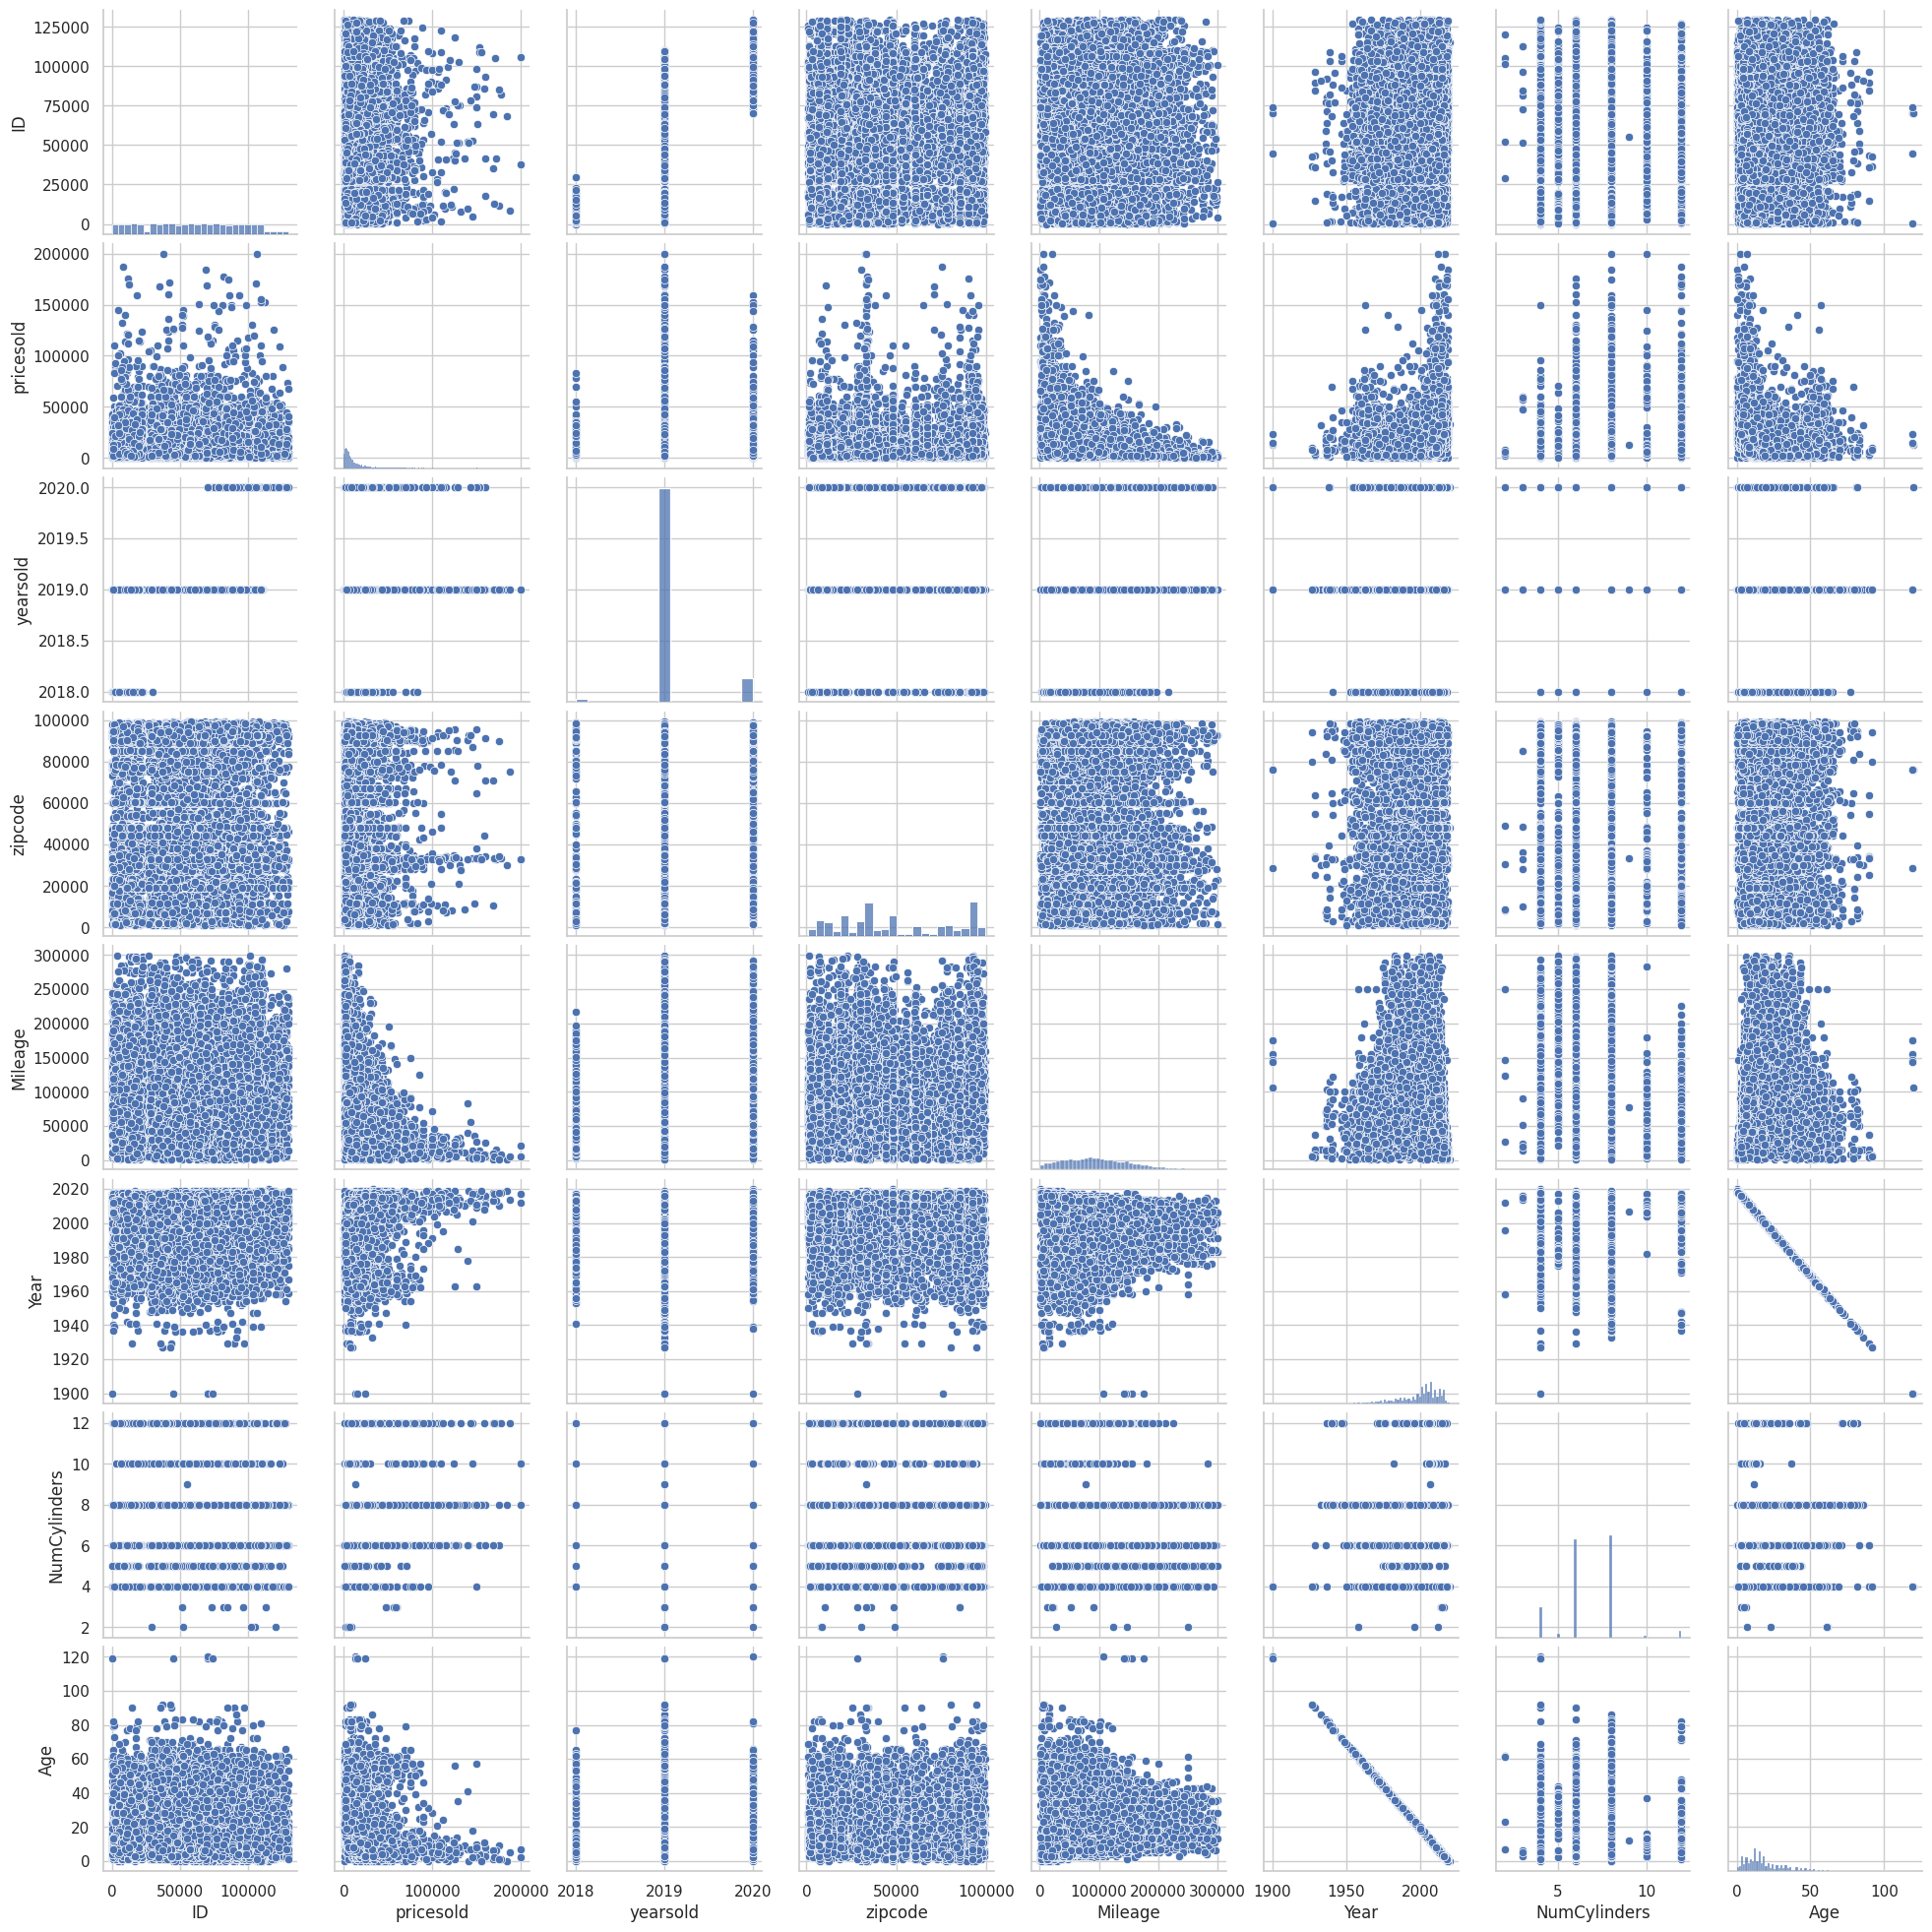

In [ ]:
sns.pairplot(luxury_cars)
plt.show()

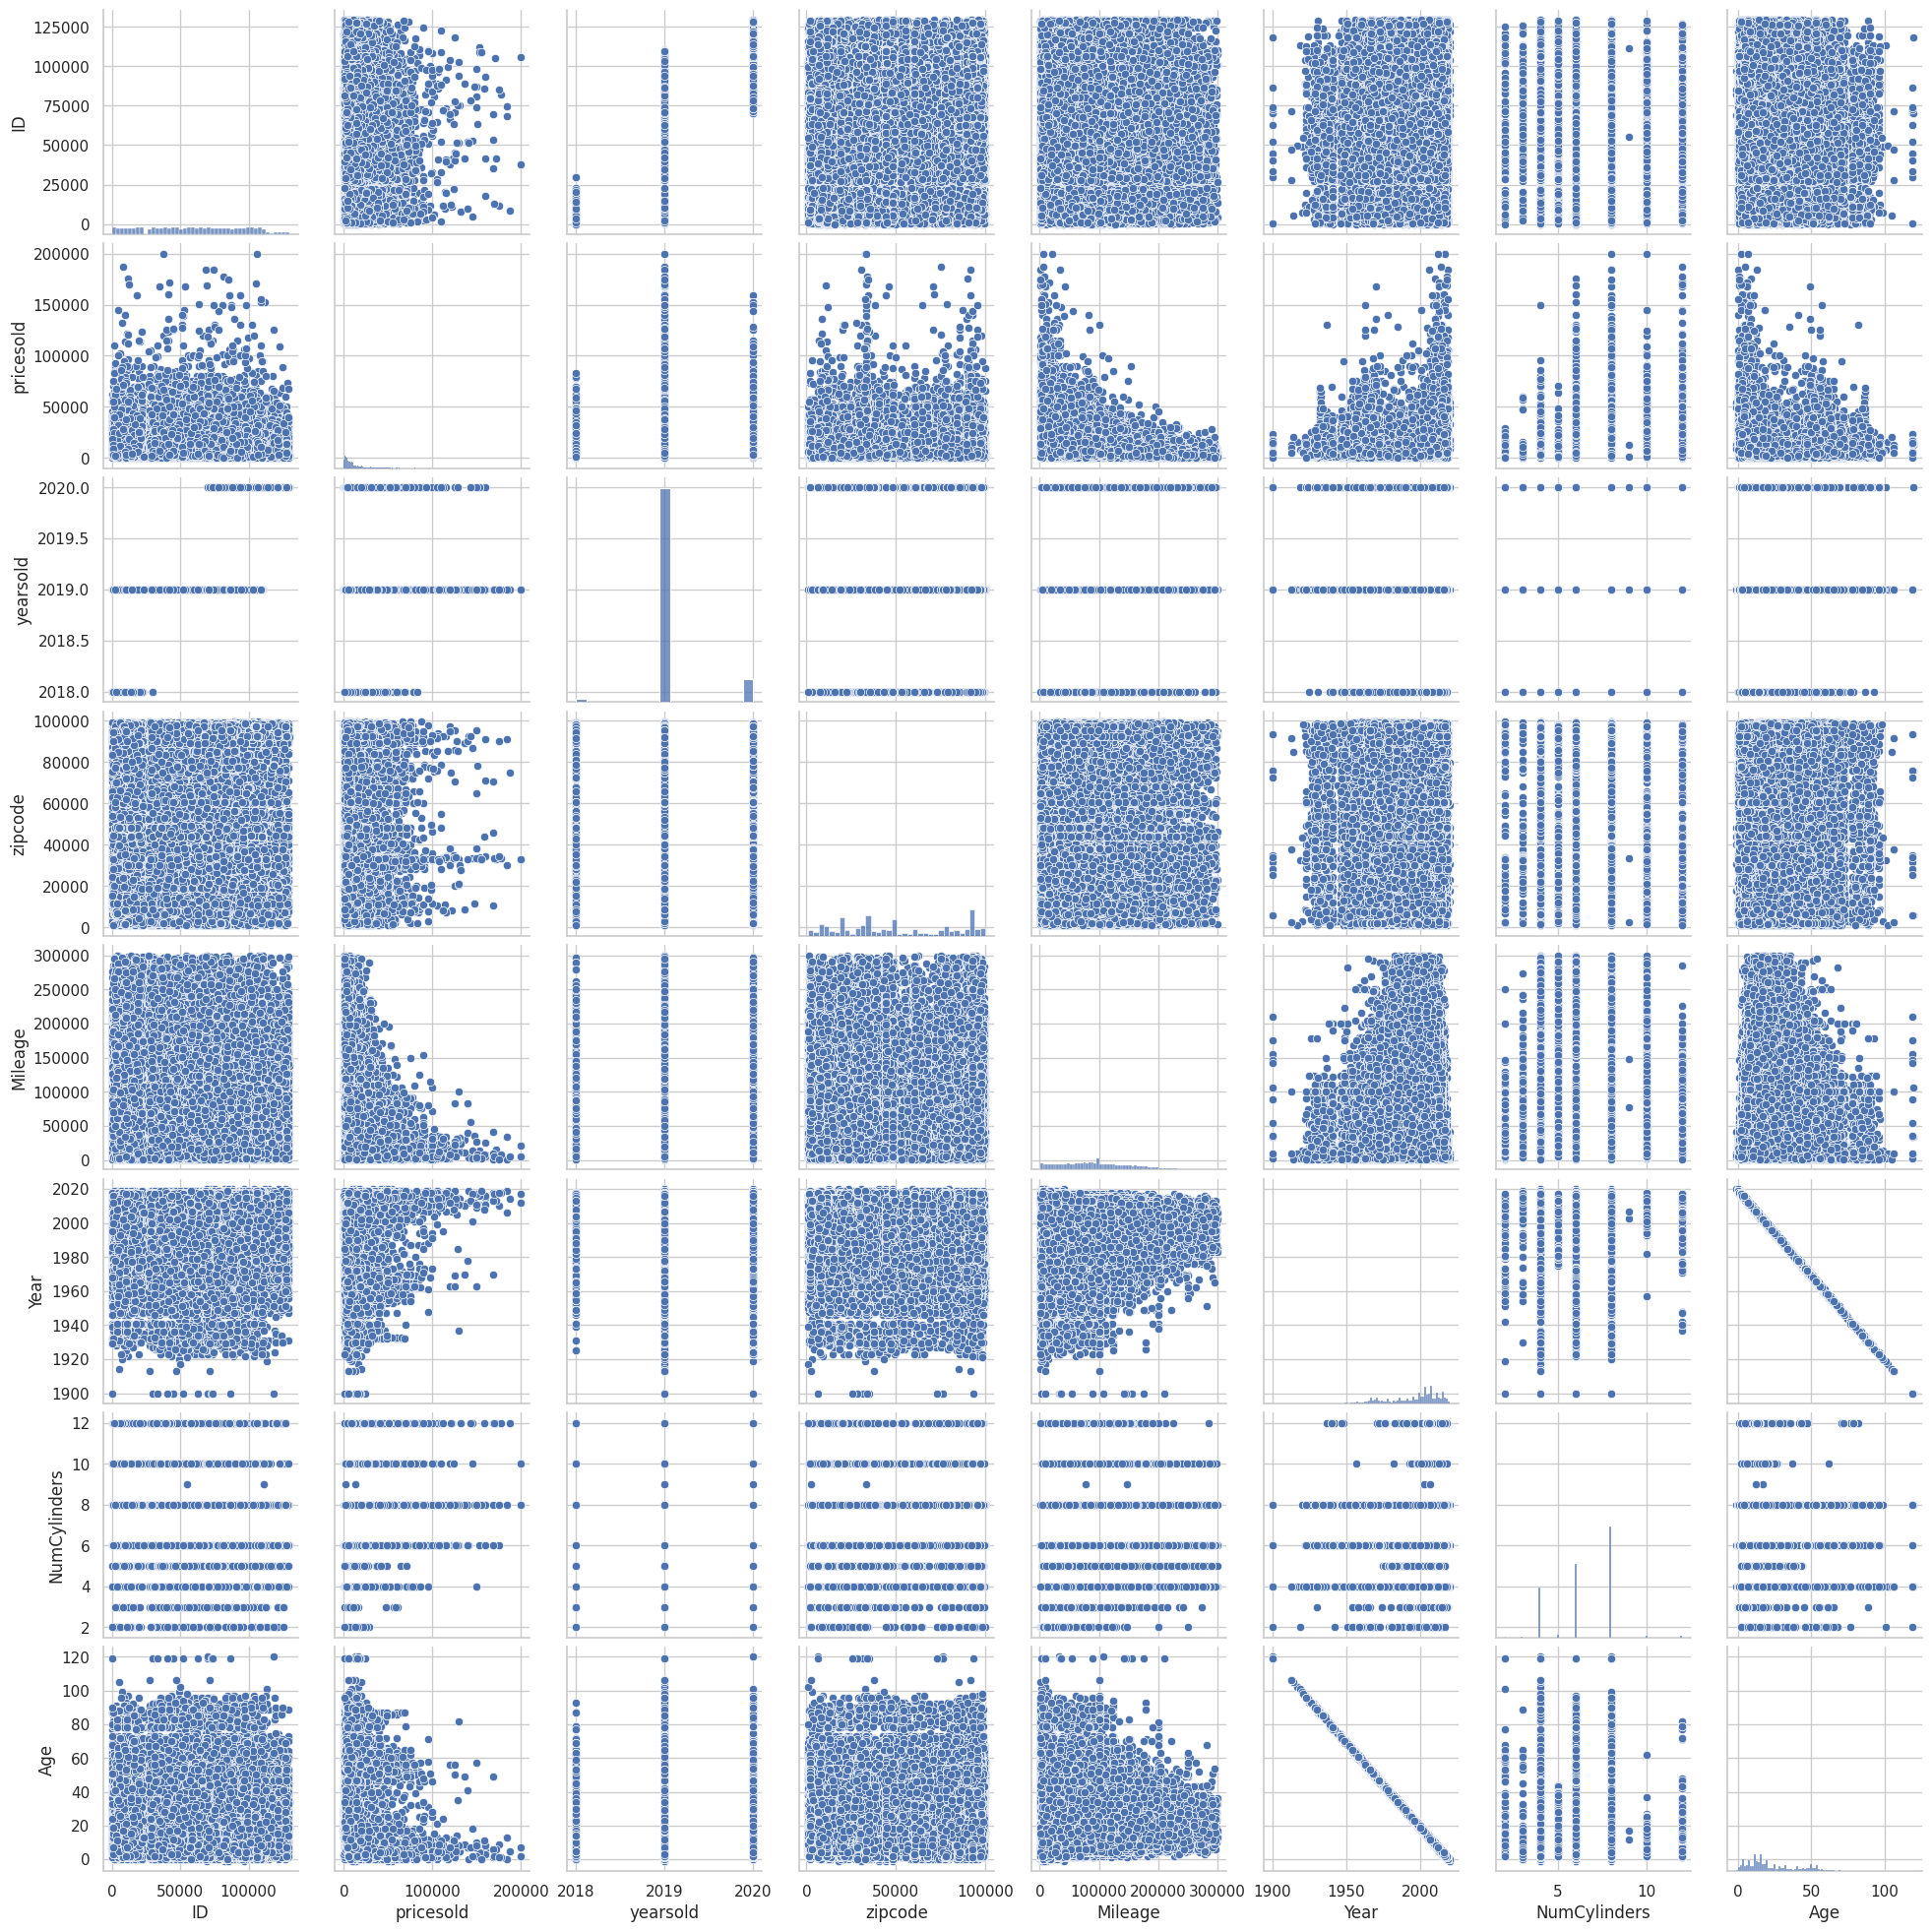

In [ ]:
sns.pairplot(df)
plt.show()

              pricesold  yearsold   Mileage  NumCylinders
pricesold      1.000000  0.001729 -0.448637      0.202265
yearsold       0.001729  1.000000  0.007688     -0.016644
Mileage       -0.448637  0.007688  1.000000     -0.076245
NumCylinders   0.202265 -0.016644 -0.076245      1.000000


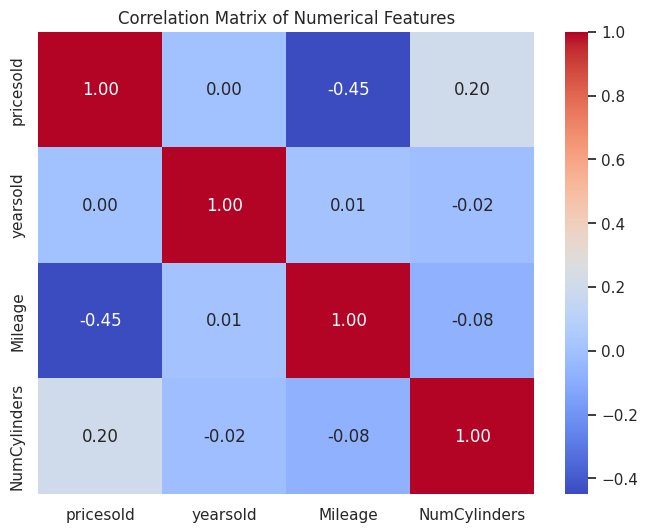

In [ ]:
correlation_matrix = df[['pricesold', 'yearsold', 'Mileage', 'NumCylinders']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Selling price by Age

In [ ]:
df = df[df['Year']>0]
df.loc[df['Year']<100,['Year']] += 1900

In [ ]:
df['Age'] = df['yearsold'] - df['Year']

In [ ]:
df = df[df['Age']<100]

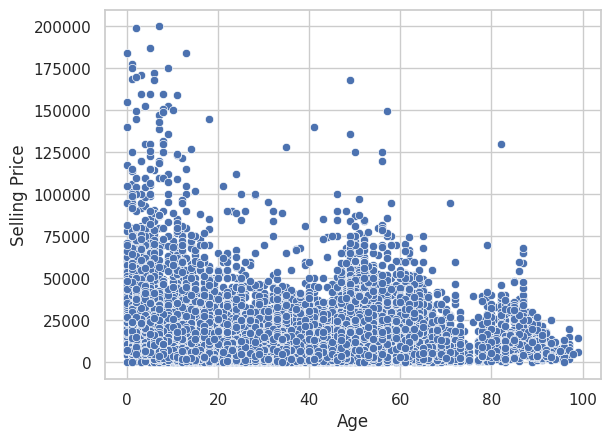

In [ ]:
df = df[df['Age']>=0]
g1 = sns.scatterplot(x=df['Age'],y=df['pricesold'])
g1.set(xlabel='Age', ylabel='Selling Price')
plt.show()

In [ ]:
df[df['pricesold']>200000]

Empty DataFrame
Columns: [ID, pricesold, yearsold, zipcode, Mileage, Make, Model, Year, Engine, BodyType, NumCylinders, DriveType, Age, STATE]
Index: []

### Selling price by miles

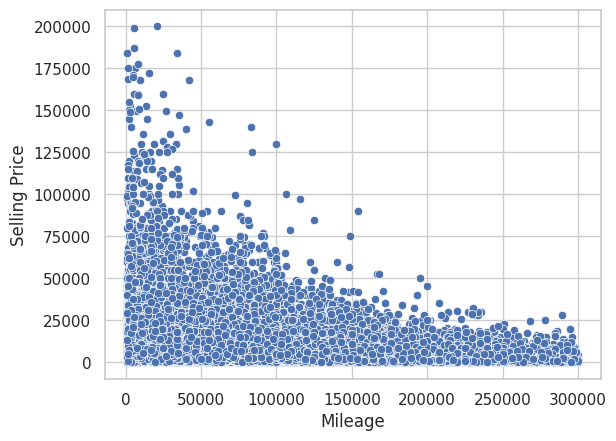

In [ ]:
g2 = sns.scatterplot(x=df['Mileage'],y=df['pricesold'])
g2.set(xlabel='Mileage', ylabel='Selling Price')
plt.show()

### Selling price by Numcylinders

In [ ]:
df = df[df['NumCylinders'] <= 16]

<ipython-input-29-69a8ae4af08a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumCylinders'],kde=False,bins=16)


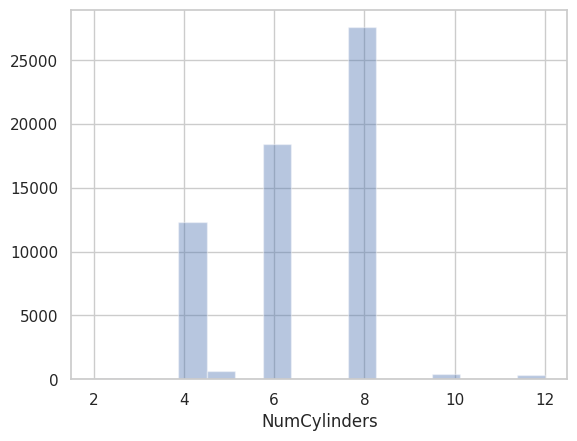

In [ ]:
sns.distplot(df['NumCylinders'],kde=False,bins=16)
plt.show()

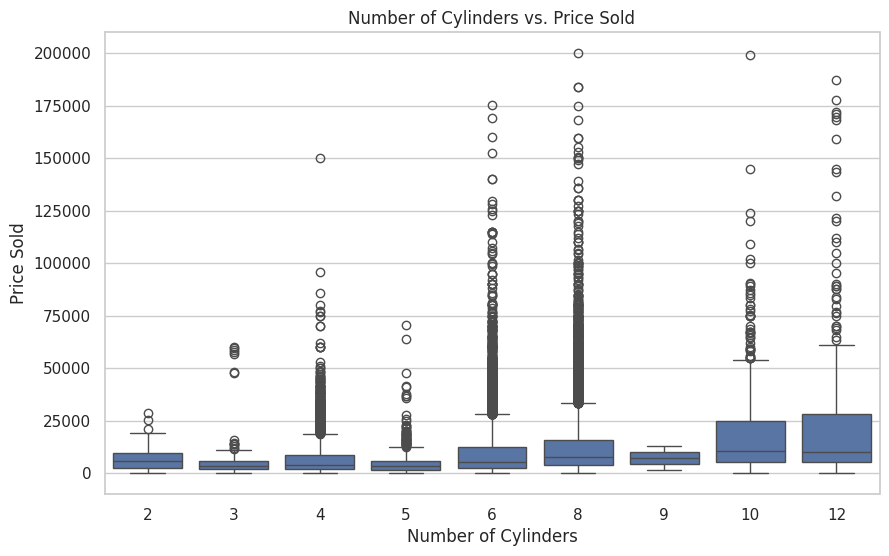

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumCylinders', y='pricesold', data=df)
plt.title('Number of Cylinders vs. Price Sold')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price Sold')
plt.show()

## Splitting dataset into Oldtimers and Newtimers
I think it makes sense to split the dataset into two. Historical cars (age >25 years) and "normal" cars that are younger than 25 years

In [ ]:
oldtimers = df[df['Age'] > 25]
newtimers = df[df['Age'] <= 25]

### Age/selling price distribution

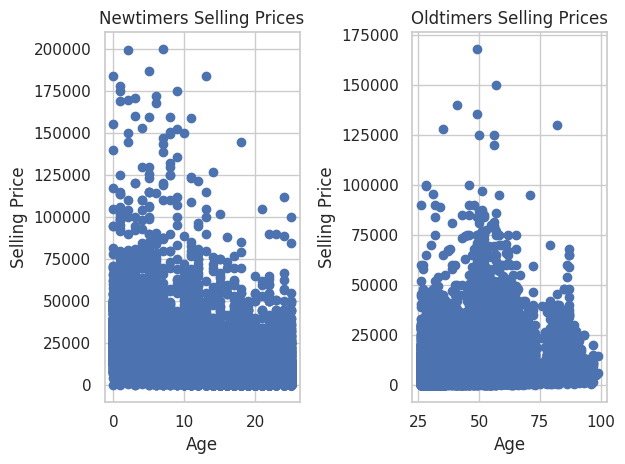

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(newtimers['Age'],newtimers['pricesold'])
plt.ylabel('Selling Price')
plt.xlabel('Age')
plt.title('Newtimers Selling Prices')
plt.subplot(1, 2, 2)
plt.scatter(oldtimers['Age'],oldtimers['pricesold'])
plt.ylabel('Selling Price')
plt.xlabel('Age')
plt.title('Oldtimers Selling Prices')
plt.tight_layout()
plt.show()

### mapping

In [ ]:
states = df['STATE'].value_counts().index
salescount = df['STATE'].value_counts().values

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [ dict(
        type='choropleth',
        locations = states,
        z = salescount,
        locationmode = 'USA-states',
        colorbar = dict(
            title = "Salescount")
        ) ]

layout = dict(
    title = 'US used car sales by states',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa')
    )
)

fig = dict(data=data, layout=layout)


In [ ]:
import plotly.offline as py

py.plot(fig, filename='d3-cloropleth-map.html')

'd3-cloropleth-map.html'

## More Visualizations


### Sales by Car Makes
What's the Car Make breakdown in both groups?

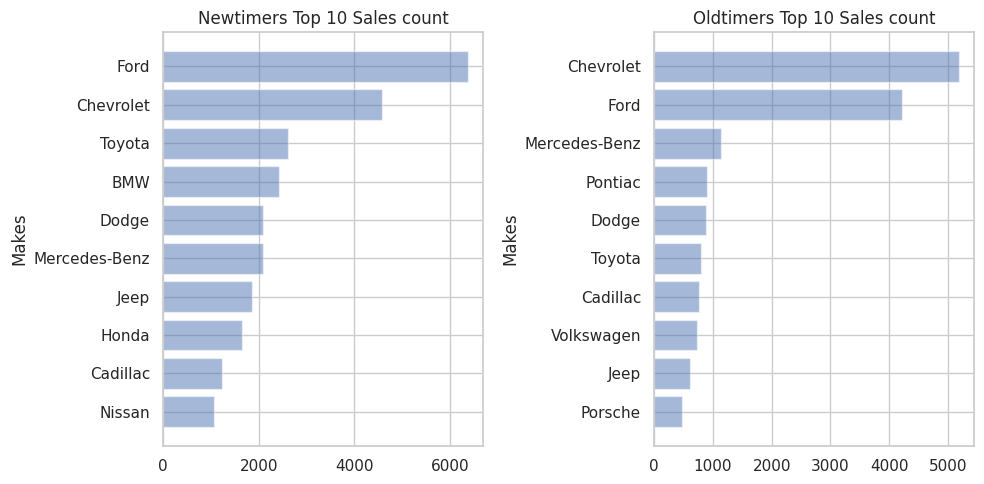

In [ ]:
import numpy as np

plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1, 2, 1)
makes = newtimers['Make'].value_counts(ascending=True).tail(10).index
y_pos = np.arange(len(makes))
salescount = newtimers['Make'].value_counts(ascending=True).tail(10).values
plt.barh(y_pos, salescount, align='center', alpha=0.5)
plt.yticks(y_pos, makes)
plt.ylabel('Makes')
plt.title('Newtimers Top 10 Sales count')
plt.subplot(1, 2, 2)
makes = oldtimers['Make'].value_counts(ascending=True).tail(10).index
y_pos = np.arange(len(makes))
salescount = oldtimers['Make'].value_counts(ascending=True).tail(10).values
plt.barh(y_pos, salescount, align='center', alpha=0.5)
plt.yticks(y_pos, makes)
plt.ylabel('Makes')
plt.title('Oldtimers Top 10 Sales count')
plt.tight_layout()
plt.show()

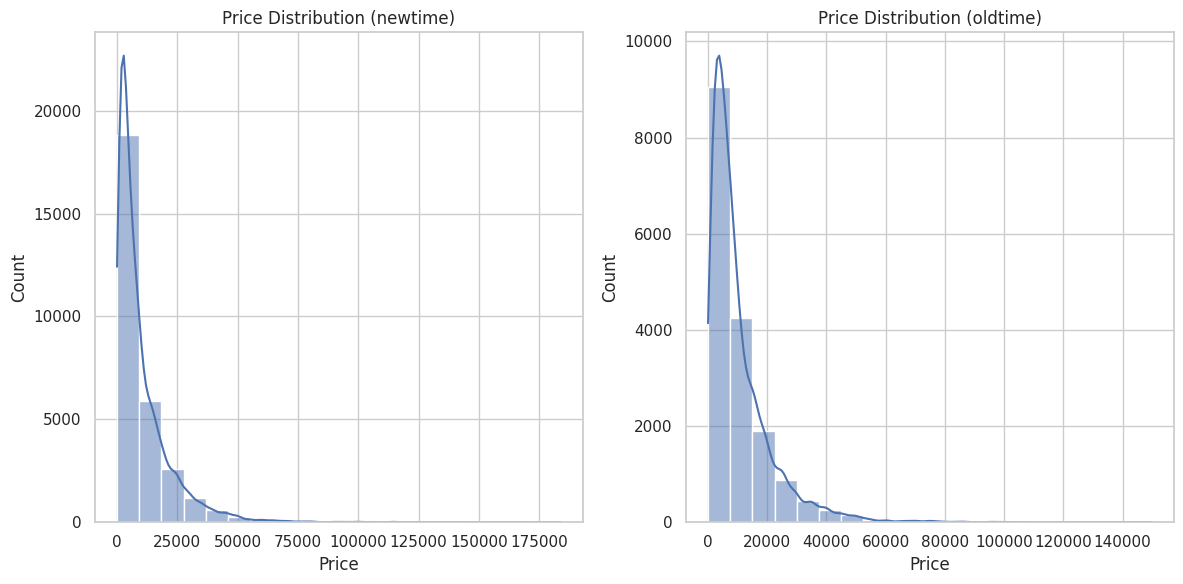

In [ ]:
make_counts = df['Make'].value_counts()
makes_to_keep = make_counts[make_counts >= 1000].index
df_filtered = df[df['Make'].isin(makes_to_keep)]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_filtered[df_filtered['Age'] <= 25]['pricesold'], bins=20, kde=True)
plt.title('Price Distribution (newtime)')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
sns.histplot(df_filtered[df_filtered['Age'] > 25]['pricesold'], bins=20, kde=True)
plt.title('Price Distribution (oldtime)')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


In [ ]:
# Top 20 Makes by Average Price
top_20_makes = df.groupby('Make')['pricesold'].mean().nlargest(20)
plt.figure(figsize=(12, 6))
top_20_makes.plot(kind='bar')
plt.title('Top 20 Car Makes by Average Price')
plt.xlabel('Car Make')
plt.ylabel('Average Price Sold')
plt.xticks(rotation=45)
plt.show()

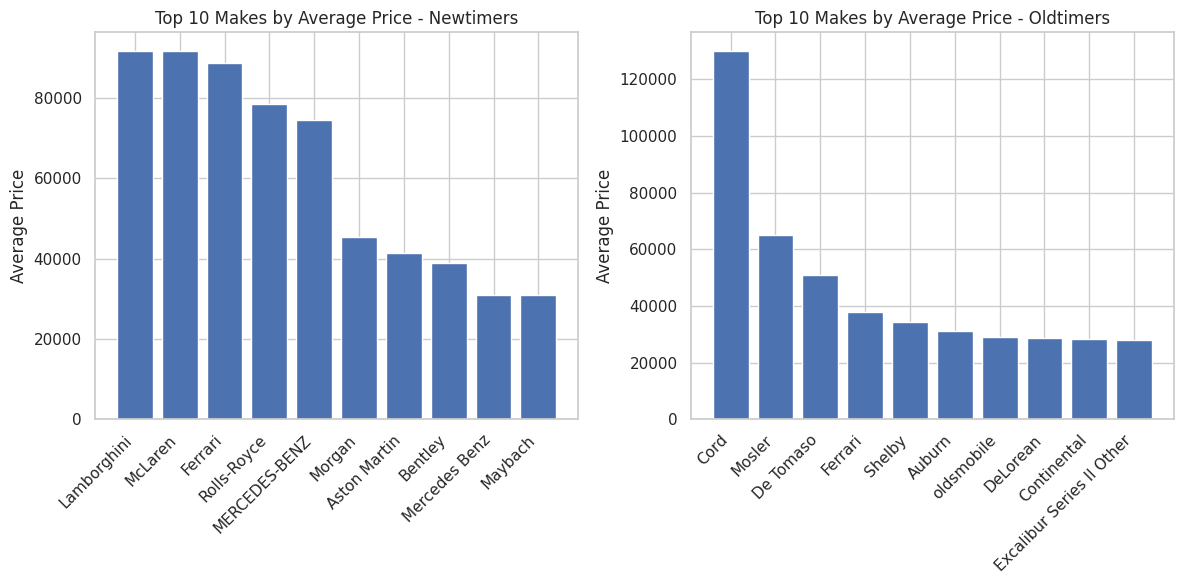

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_prices_new = newtimers.groupby('Make')['pricesold'].mean().nlargest(10)
plt.bar(top_prices_new.index, top_prices_new.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Makes by Average Price - Newtimers')
plt.ylabel('Average Price')

plt.subplot(1, 2, 2)
top_prices_old = oldtimers.groupby('Make')['pricesold'].mean().nlargest(10)
plt.bar(top_prices_old.index, top_prices_old.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Makes by Average Price - Oldtimers')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

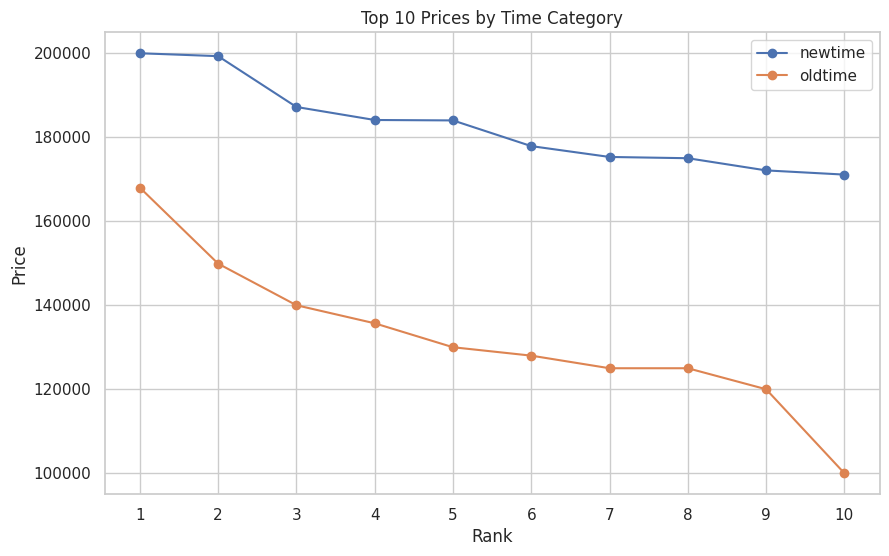

In [ ]:
df['time_category'] = 'newtime'
df.loc[df['Age'] > 25, 'time_category'] = 'oldtime'

top_10_prices = df.groupby('time_category')['pricesold'].nlargest(10)

plt.figure(figsize=(10, 6))
for category in ['newtime', 'oldtime']:
    prices = top_10_prices[category].values
    plt.plot(range(1, 11), prices, marker='o', linestyle='-', label=category)

plt.xlabel('Rank')
plt.ylabel('Price')
plt.title('Top 10 Prices by Time Category')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Newtimers
newtimers_top10_price = newtimers.groupby('Make')['pricesold'].mean().nlargest(10)
print("Top 10 Makes by Average Price (Newtimers):\n", newtimers_top10_price)

# Oldtimers
oldtimers_top10_price = oldtimers.groupby('Make')['pricesold'].mean().nlargest(10)
print("\nTop 10 Makes by Average Price (Oldtimers):\n", oldtimers_top10_price)

Top 10 Makes by Average Price (Newtimers):
 Make
Lamborghini      91706.666667
McLaren          91525.000000
Ferrari          88610.892857
Rolls-Royce      78581.250000
MERCEDES-BENZ    74540.000000
Morgan           45350.000000
Aston Martin     41372.105263
Bentley          39015.454545
Mercedes Benz    30915.000000
Maybach          30900.000000
Name: pricesold, dtype: float64

Top 10 Makes by Average Price (Oldtimers):
 Make
Cord                         130000.000000
Mosler                        65000.000000
De Tomaso                     50893.333333
Ferrari                       37947.407407
Shelby                        34463.902439
Auburn                        31000.000000
oldsmobile                    29100.000000
DeLorean                      28580.357143
Continental                   28500.000000
Excalibur Series II Other     28000.000000
Name: pricesold, dtype: float64


### Sales by Region

In [ ]:
states = df['STATE'].value_counts().index
salescount = df['STATE'].value_counts().values

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [ dict(
        type='choropleth',
        locations = states,
        z = salescount,
        locationmode = 'USA-states',
        colorbar = dict(
            title = "Salescount")
        ) ]

layout = dict(
    title = 'US used car sales by states',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa')
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

### Drive type

In [ ]:
drive_type_counts = df['DriveType'].value_counts()
drive_types_over_200 = drive_type_counts[drive_type_counts > 200]
print(f"Number of drive types with more than 200 occurrences: {len(drive_types_over_200)}")
drive_types_over_200

Number of drive types with more than 200 occurrences: 7


DriveType
RWD    24016
4WD    11108
FWD     9781
0       6937
AWD     5170
2WD      268
4x4      217
Name: count, dtype: int64

In [ ]:
print(df['DriveType'].value_counts())

DriveType
RWD                                        24016
4WD                                        11108
FWD                                         9781
0                                           6937
AWD                                         5170
                                           ...  
AWD-Lockable Differential Traction Mode        1
4WD Crew Cab 143.5 LTZ                         1
Manual three speed                             1
Automatic, 4-Spd w/Overdrive                   1
4WD-3.73 Limited Slip Axle                     1
Name: count, Length: 792, dtype: int64


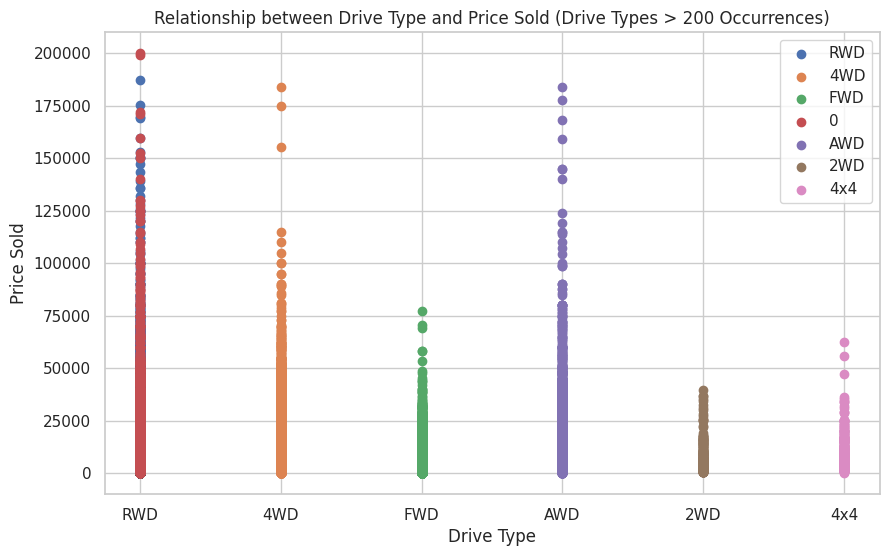

In [ ]:
drive_types_over_200 = df['DriveType'].value_counts()[df['DriveType'].value_counts() > 200].index

plt.figure(figsize=(10, 6))
for drive_type in drive_types_over_200:
    subset = df[df['DriveType'] == drive_type]
    plt.scatter(subset['DriveType'], subset['pricesold'], label=drive_type)

plt.xlabel('Drive Type')
plt.ylabel('Price Sold')
plt.title('Relationship between Drive Type and Price Sold (Drive Types > 200 Occurrences)')
plt.legend()
plt.show()

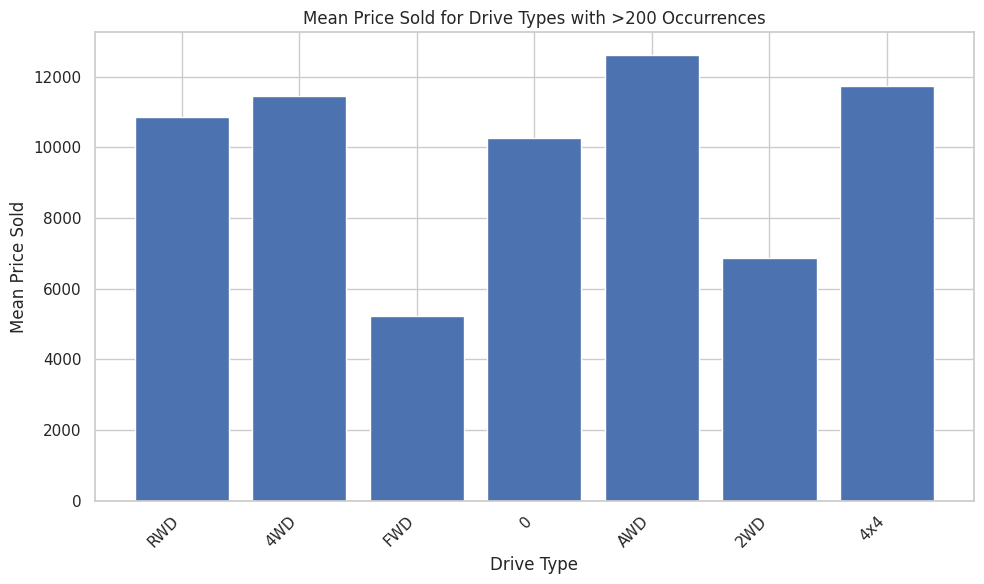

In [ ]:
drive_types_over_200 = df['DriveType'].value_counts()[df['DriveType'].value_counts() > 200].index

plt.figure(figsize=(10, 6))
mean_prices = {}
for drive_type in drive_types_over_200:
    subset = df[df['DriveType'] == drive_type]
    mean_price = subset['pricesold'].mean()
    mean_prices[str(drive_type)] = mean_price

plt.bar(mean_prices.keys(), mean_prices.values())
plt.xlabel('Drive Type')
plt.ylabel('Mean Price Sold')
plt.title('Mean Price Sold for Drive Types with >200 Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Body type

In [ ]:
body_type_counts = df['BodyType'].value_counts()
body_types_over_400 = body_type_counts[body_type_counts > 400]
print(f"Number of body types with more than 400 occurrences: {len(body_types_over_400)}")
body_types_over_400

Number of body types with more than 400 occurrences: 12


BodyType
Sedan                  10737
Coupe                   9975
SUV                     9417
Convertible             6355
0                       5938
Standard Cab Pickup     2407
Crew Cab Pickup         2033
Extended Cab Pickup     1545
Wagon                   1482
Hatchback               1466
Pickup Truck             906
Minivan                  576
Name: count, dtype: int64

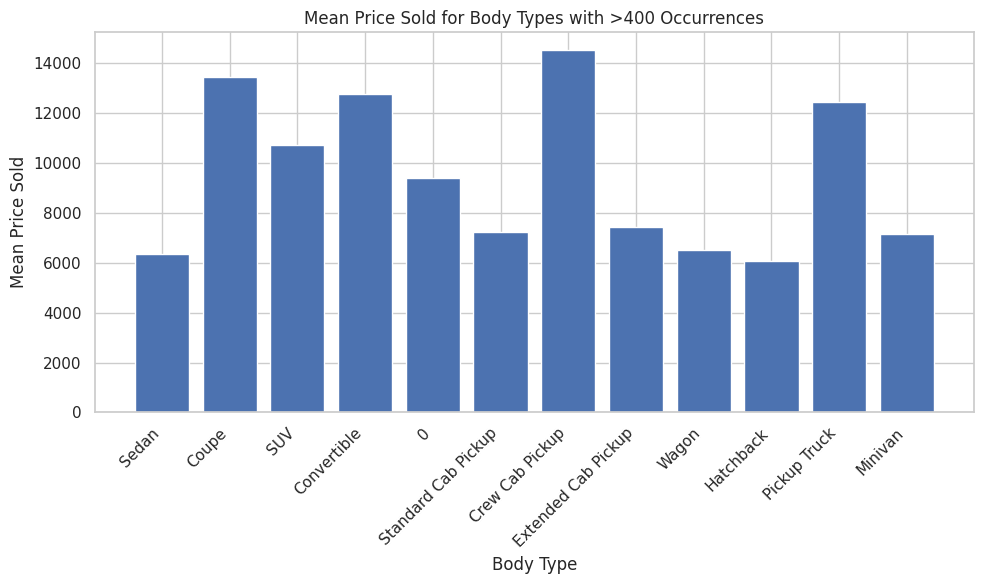

In [ ]:
body_types_over_400 = df['BodyType'].value_counts()[df['BodyType'].value_counts() > 400].index

plt.figure(figsize=(10, 6))
mean_prices = {}
for body_type in body_types_over_400:
    subset = df[df['BodyType'] == body_type]
    mean_price = subset['pricesold'].mean()
    mean_prices[str(body_type)] = mean_price

plt.bar(mean_prices.keys(), mean_prices.values())
plt.xlabel('Body Type')
plt.ylabel('Mean Price Sold')
plt.title('Mean Price Sold for Body Types with >400 Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analysis on a specific model


### Let's focus on newtimers and one of the top selling models, the 2007 Ford Mustang.

In [ ]:
newtimers.groupby(by=['Make','Model','Year']).size().sort_values(ascending=False).head()

Make       Model    Year
Ford       Mustang  2007    94
Chevrolet  Equinox  2018    79
Ford       F-150    2018    77
           F-250    2008    72
           F-150    2014    70
dtype: int64

In [ ]:
mileage = newtimers[(newtimers['Make'] == 'Ford')
          & (newtimers['Model'] == 'Mustang')
          & (newtimers['Year'] == 2007)]['Mileage']
salesprices = newtimers[(newtimers['Make'] == 'Ford')
          & (newtimers['Model'] == 'Mustang')
          & (newtimers['Year'] == 2007)]['pricesold']

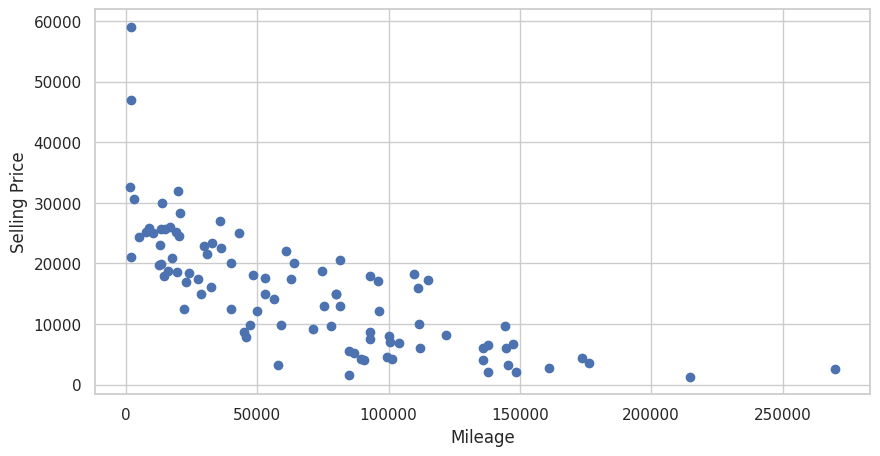

In [ ]:
plt.scatter(mileage,salesprices)
plt.ylabel('Selling Price')
plt.xlabel('Mileage')
plt.show()

### Let's focus on newtimers and one of the top selling models, the 2011 Chevrolet Silverado 1500.

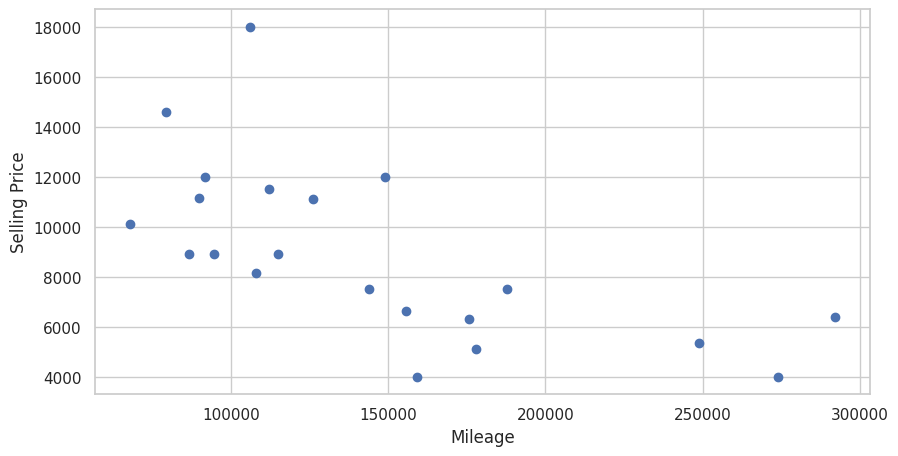

In [ ]:
newtimers.groupby(by=['Make','Model','Year']).size().sort_values(ascending=False).head()
mileage = newtimers[(newtimers['Make'] == 'Chevrolet')
          & (newtimers['Model'] == 'Silverado 1500')
          & (newtimers['Year'] == 2011)]['Mileage']
salesprices = newtimers[(newtimers['Make'] == 'Chevrolet')
          & (newtimers['Model'] == 'Silverado 1500')
          & (newtimers['Year'] == 2011)]['pricesold']
plt.scatter(mileage,salesprices)
plt.ylabel('Selling Price')
plt.xlabel('Mileage')
plt.show()

# Model Building

In [ ]:
import pandas as pd
data_cleaned = pd.read_csv('processed_used_car_data.csv')

In [ ]:
data_cleaned.head()


ID  pricesold  yearsold  zipcode  Mileage     Make     Model  Year  \
0  119660       8750      2020    33449    55000   Jaguar       XJS  1995   
1   80773      11600      2019     7852    97200     Ford   Mustang  1968   
2   64287      44000      2019     7728    40703  Porsche       911  2002   
3   29023       1330      2019     7043   167000    Honda     Civic  2001   
4   72418      14100      2019     7014   109500     Jeep  Wrangler  2012   

                    Engine     BodyType  NumCylinders DriveType  Age STATE  
0  4.0L In-Line 6 Cylinder  Convertible             6       RWD   25    FL  
1           289 cu. in. V8        Coupe             8       RWD   51    NJ  
2                     3.6L        Coupe             6       AWD   17    NJ  
3                        0        Coupe             4       FWD   18    NJ  
4                     3.6L          SUV             6       4WD    7    NJ

In [ ]:
data_cleaned.nunique()

ID              60005
pricesold        3400
yearsold            3
zipcode         12369
Mileage         34615
Make              207
Model            2226
Year              106
Engine          14939
BodyType         1554
NumCylinders        9
DriveType         792
Age               107
STATE              52
dtype: int64

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60005 entries, 0 to 60004
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            60005 non-null  int64 
 1   pricesold     60005 non-null  int64 
 2   yearsold      60005 non-null  int64 
 3   zipcode       60005 non-null  int64 
 4   Mileage       60005 non-null  int64 
 5   Make          60005 non-null  object
 6   Model         60005 non-null  object
 7   Year          60005 non-null  int64 
 8   Engine        60005 non-null  object
 9   BodyType      60005 non-null  object
 10  NumCylinders  60005 non-null  int64 
 11  DriveType     60005 non-null  object
 12  Age           60005 non-null  int64 
 13  STATE         59920 non-null  object
dtypes: int64(8), object(6)
memory usage: 6.4+ MB


In [ ]:
data_cleaned['Make'].unique()

array(['Jaguar', 'Ford', 'Porsche', 'Honda', 'Jeep', 'Chevrolet',
       'Nissan', 'Chrysler', 'Toyota', 'Mercedes-Benz', 'Studebaker',
       'Dodge', 'Cadillac', 'Maserati', 'Plymouth', 'Ferrari',
       'Volkswagen', 'Lexus', 'Replica/Kit Makes', 'Oldsmobile', 'BMW',
       'International Harvester', 'Riley', 'Pontiac', 'Nash',
       'Alfa Romeo', 'GMC', 'Mitsubishi', 'CHEVROLET', 'Ram', 'Puma',
       'Suzuki', 'Kia', 'Buick', 'Mercury', 'Lincoln', 'Mazda', 'Volvo',
       'Land Rover', 'Isuzu', 'Willys', 'Infiniti', 'Shelby', 'Mini',
       'Acura', 'Datsun', 'Packard', 'Subaru', 'TVR', 'Hummer', 'AMC',
       'Rolls-Royce', 'Bentley', 'Hudson', 'Kaiser', 'MERCEDES-BENZ',
       'MG', 'Opel', 'Saab', 'Aston Martin', 'Fisker', 'Audi',
       'Diamond T', 'Fiat', 'Renault', 'J. I. Case', 'Austin Healey',
       'Austin', 'Citroën', 'Geo', 'Triumph', 'TOYOTA', 'Diamond',
       'Hyundai', 'Edsel', 'Saturn', 'Bricklin', 'Lamborghini',
       'Other Makes', 'Dort', 'mazda', 'Morris', 

In [ ]:
data_cleaned['Model'].unique()

array(['XJS', 'Mustang', '911', ..., 'Niro', 'Travelall R110',
       'Belvedere 2'], dtype=object)

## Preprocess Data

In [ ]:
# Importing necessary Packages
import pandas as pd
import numpy as np
import seaborn as sns
#import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import re
#import statsmodels.formula.api as smf
#import statsmodels.api as sm
!pip install plotly_express -q
import plotly_express as px
from sklearn.cluster import KMeans
'''
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
import statsmodels.formula.api as smf'''

'\nfrom bokeh.io import output_notebook, show\nfrom bokeh.plotting import figure\nfrom bokeh.models import ColumnDataSource, HoverTool\nfrom bokeh.palettes import Category10\nimport statsmodels.formula.api as smf'

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
import pandas as pd
data_cleaned = pd.read_csv('processed_used_car_data.csv')
X = data_cleaned.drop(['pricesold','zipcode','ID'], axis=1)
y = data_cleaned["pricesold"].copy() # in case we modify values in y and don't want to affect original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#extract numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

#extract categorical colums
categorical_columns = X_train.select_dtypes(include=['object']).columns

In [ ]:
#preprocessing pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler


cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", feature_name_combiner=lambda feature, category: f"{feature}={category}" )
  )

default_num_pipeline = make_pipeline(IterativeImputer(),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("cat", cat_pipeline, categorical_columns),
    ("num", default_num_pipeline, numerical_columns)
  ])

preprocessing


ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(feature_name_combiner=<function <lambda> at 0x7fbe38509120>,
                                                                handle_unknown='ignore'))]),
                                 Index(['Make', 'Model', 'Engine', 'BodyType', 'DriveType', 'STATE'], dtype='object')),
                                ('num',
                                 Pipeline(steps=[('iterativeimputer',
                                                  IterativeImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['yearsold', 'Mileage', 'Year', 'NumCylinders', 'Age'], dtype='object'))])

In [ ]:
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(feature_name_combiner=<function <lambda> at 0x7a21222dc040>,
                                                                handle_unknown='ignore'))]),
                                 Index(['Make', 'Model', 'Engine', 'BodyType', 'DriveType', 'STATE'], dtype='object')),
                                ('num',
                                 Pipeline(steps=[('iterativeimputer',
                                                  IterativeImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['yearsold', 'Mileage', 'Year', 'NumCylinders', 'Age'], dtype='object'))])

In [ ]:
preprocessing.get_feature_names_out()
#get number of features
len(preprocessing.get_feature_names_out())

16149

## Model Selection

In [ ]:
#exploring different models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming `preprocessing` is a defined pipeline step for data preprocessing
# Define each model pipeline with preprocessing
lin_reg = make_pipeline(preprocessing, LinearRegression())
ridge_reg = make_pipeline(preprocessing, Ridge())
lasso_reg = make_pipeline(preprocessing, Lasso())
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
forest_reg = make_pipeline(preprocessing, RandomForestRegressor())
svm_reg = make_pipeline(preprocessing, SVR())
gb_reg = make_pipeline(preprocessing, GradientBoostingRegressor())

In [ ]:
# Evaluate each model using cross-validation
lin_cv_rmses = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Linear Regression Cross-Validation RMSE: {lin_cv_rmses.mean():.0f}")



Average Linear Regression Cross-Validation RMSE: 8799


In [ ]:
ridge_cv_rmses = -cross_val_score(ridge_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Ridge Regression Cross-Validation RMSE: {ridge_cv_rmses.mean():.0f}")



Average Ridge Regression Cross-Validation RMSE: 8350


In [ ]:
lasso_cv_rmses = -cross_val_score(lasso_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Lasso Regression Cross-Validation RMSE: {lasso_cv_rmses.mean():.0f}")

In [ ]:
tree_cv_rmses = -cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Decision Tree Regression Cross-Validation RMSE: {tree_cv_rmses.mean():.0f}")




Average Decision Tree Regression Cross-Validation RMSE: 8625


In [ ]:
gb_cv_rmses = -cross_val_score(gb_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Gradient Boosting Regression Cross-Validation RMSE: {gb_cv_rmses.mean():.0f}")

Average Gradient Boosting Regression Cross-Validation RMSE: 7863


In [ ]:
pip install xgboost lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 79.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 82.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 81.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBRegressor


from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# XGBoost Regressor
xgb_reg = make_pipeline(preprocessing, XGBRegressor())
xgb_cv_rmses = -cross_val_score(xgb_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average XGBoost Regression Cross-Validation RMSE: {xgb_cv_rmses.mean():.0f}")



Average XGBoost Regression Cross-Validation RMSE: 6833


In [ ]:
# LightGBM Regressor
from lightgbm import LGBMRegressor
lgbm_reg = make_pipeline(preprocessing, LGBMRegressor())
lgbm_cv_rmses = -cross_val_score(lgbm_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average LightGBM Regression Cross-Validation RMSE: {lgbm_cv_rmses.mean():.0f}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1925
[LightGBM] [Info] Number of data points in the train set: 36002, number of used features: 733
[LightGBM] [Info] Start training from score 10161.522138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1921
[LightGBM] [Info] Number of data points in the train set: 36002, number of used features: 731
[LightGBM] [Info] Start training from score 10219.004222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

In [ ]:
# CatBoost Regressor
from catboost import CatBoostRegressor
catboost_reg = make_pipeline(preprocessing, CatBoostRegressor(verbose=0))
catboost_cv_rmses = -cross_val_score(catboost_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average CatBoost Regression Cross-Validation RMSE: {catboost_cv_rmses.mean():.0f}")

Average CatBoost Regression Cross-Validation RMSE: 6822


## Training the best models (XGBoost & CatBoost)

In [ ]:
xgb_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(feature_name_combiner=<function <lambda> at 0x7b8c127204c0>,
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Make', 'Model', 'Engine', 'BodyType', 'DriveType', 'STATE'], dtype='object')),
                                                 ('nu...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
#get top 10 features
xgb_feature_importances = xgb_reg.named_steps['xgbregressor'].feature_importances_

xgb_feature_importances_df = pd.DataFrame({
    "Feature": preprocessing.get_feature_names_out(),
    "Importance": xgb_feature_importances
})

In [ ]:
xgb_feature_importances_df.to_csv('xgb_feature_importances.csv', index=False)

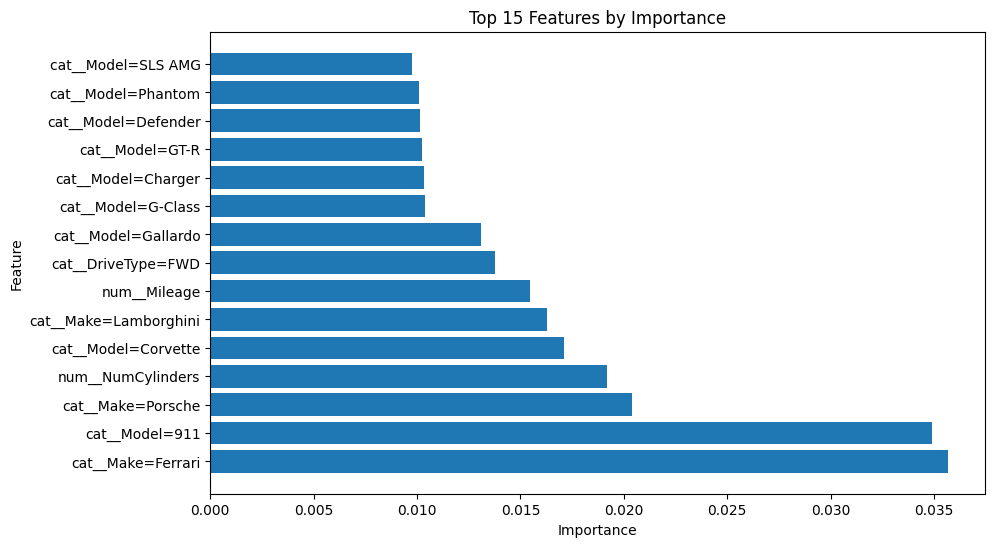

In [ ]:
#plot top 15 features
top_15_features = xgb_feature_importances_df.nlargest(15, "Importance")
plt.figure(figsize=(10, 6))
plt.barh(top_15_features["Feature"], top_15_features["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features by Importance")
plt.show()


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform


# Combine preprocessing and model into a single pipeline
xgb_pipeline = make_pipeline(preprocessing, XGBRegressor(objective='reg:squarederror', tree_method='hist'))



# Define the parameter grid for XGBRegressor with random ranges
param_grid = {
    'xgbregressor__max_depth': randint(3, 100),  # Random depth between 3 and 10
    'xgbregressor__min_child_weight': randint(5, 20),  # Random values between 5 and 20
    'xgbregressor__gamma': uniform(0, 5),  # Random float between 0 and 5
    'xgbregressor__subsample': uniform(0.4, 0.6),  # Random float between 0.6 and 1.0
    'xgbregressor__colsample_bytree': uniform(0.3, 0.6),  # Random float between 0.3 and 0.7
    'xgbregressor__learning_rate': uniform(0.01, 0.09),  # Random float between 0.01 and 0.1
    'xgbregressor__n_estimators': randint(100, 1000),  # Random integer between 100 and 1000
    'xgbregressor__reg_alpha': randint(0, 10),  # Random integer between 0 and 10
    'xgbregressor__reg_lambda': randint(1, 10)  # Random integer between 1 and 10
}


# Halving Random Search
halving_search = HalvingRandomSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_grid,
    factor=3,  # Number of candidates reduced at each iteration
    scoring='neg_mean_squared_error',
    resource='n_samples',
    max_resources=5000,
    random_state=42,
    n_jobs=-1,
    cv=3
)

# Fit the search
halving_search.fit(X, y)

# Best Parameters
print("Best Parameters:", halving_search.best_params_)


Best Parameters: {'xgbregressor__colsample_bytree': 0.603574744640959, 'xgbregressor__gamma': 1.1042639148150446, 'xgbregressor__learning_rate': 0.01350369669931007, 'xgbregressor__max_depth': 67, 'xgbregressor__min_child_weight': 5, 'xgbregressor__n_estimators': 377, 'xgbregressor__reg_alpha': 1, 'xgbregressor__reg_lambda': 8, 'xgbregressor__subsample': 0.569487246386216}


In [ ]:
#print all parameter values
halving_rand_cv_res = pd.DataFrame(halving_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_rand_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)


In [ ]:
#train model w best bestparameter
from sklearn.metrics import root_mean_squared_error
final_model = halving_search.best_estimator_.fit(X_train, y_train)
#predict
final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(f'The RMSE of the selected model {final_rmse:.0f}.')

The RMSE of the selected model 6497.


In [ ]:
#save final predictions as dataframe
final_predictions = pd.DataFrame(final_predictions, columns=['pricesold'])
final_predictions.to_csv('xgb_final_predictions.csv', index=False)

In [ ]:
halving_rand_cv_res.head()

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
1251     6         4374      18.989644      0.712600         0.405542   
1250     6         4374      15.864115      0.198599         0.269210   
1249     5         1458       2.671790      0.572839         0.055698   
1246     5         1458       2.942939      0.567023         0.080850   
1248     5         1458       1.520754      0.282319         0.043707   

      std_score_time  param_xgbregressor__colsample_bytree  \
1251        0.116861                              0.603575   
1250        0.042502                              0.538567   
1249        0.009649                              0.603575   
1246        0.034016                              0.538567   
1248        0.016340                              0.615144   

      param_xgbregressor__gamma  param_xgbregressor__learning_rate  \
1251                   1.104264                           0.013504   
1250                   1.321381                           0.028480   
1249                   1.104264                           0.013504   
1246                   1.321381                           0.028480   
1248                   0.163228                           0.088170   

      param_xgbregressor__max_depth  ...  split1_test_score  \
1251                             67  ...      -5.084852e+07   
1250                             91  ...      -5.338442e+07   
1249                             67  ...      -4.776548e+07   
1246                             91  ...      -4.788798e+07   
1248                             90  ...      -4.884725e+07   

      split2_test_score  mean_test_score  std_test_score  rank_test_score  \
1251      -7.026490e+07    -6.587629e+07    1.092833e+07                5   
1250      -6.880727e+07    -6.644213e+07    9.839181e+06                6   
1249      -7.752892e+07    -5.832770e+07    1.360000e+07                1   
1246      -7.609245e+07    -5.845802e+07    1.255129e+07                2   
1248      -7.544042e+07    -5.916475e+07    1.164543e+07                3   

     split0_train_score  split1_train_score  split2_train_score  \
1251      -4.055081e+07       -3.546971e+07       -4.000952e+07   
1250      -2.488473e+07       -2.165829e+07       -2.455689e+07   
1249      -3.490701e+07       -3.299122e+07       -4.495790e+07   
1246      -2.022181e+07       -1.975578e+07       -2.869486e+07   
1248      -2.038089e+07       -1.919821e+07       -2.837191e+07   

      mean_train_score  std_train_score  
1251     -3.867668e+07     2.278412e+06  
1250     -2.369997e+07     1.449877e+06  
1249     -3.761871e+07     5.248196e+06  
1246     -2.289082e+07     4.108487e+06  
1248     -2.265034e+07     4.074472e+06  

[5 rows x 27 columns]

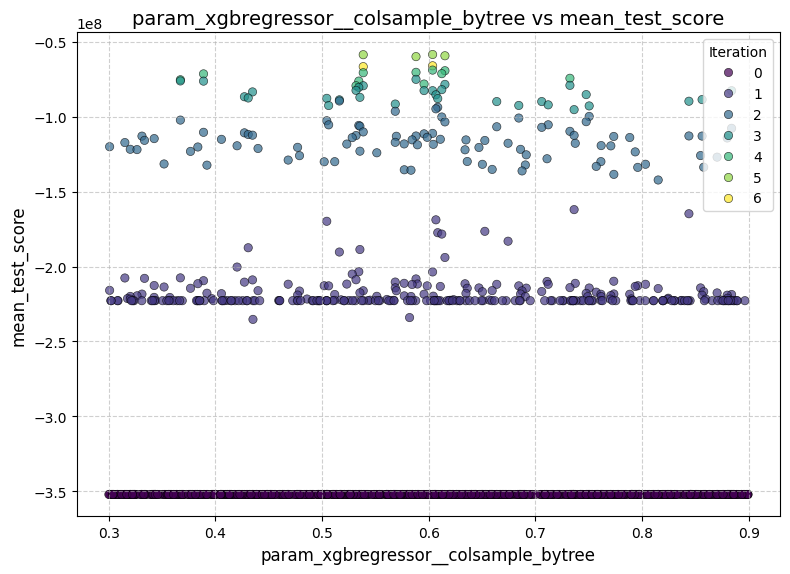

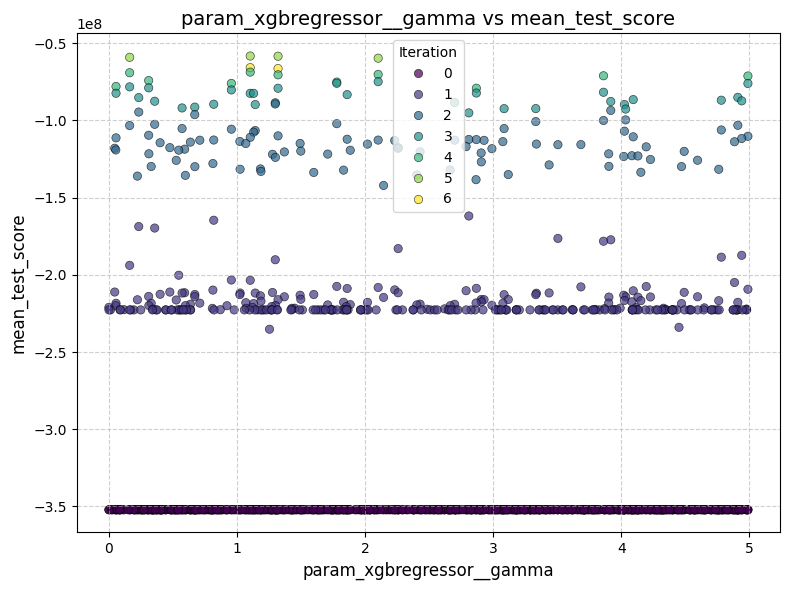

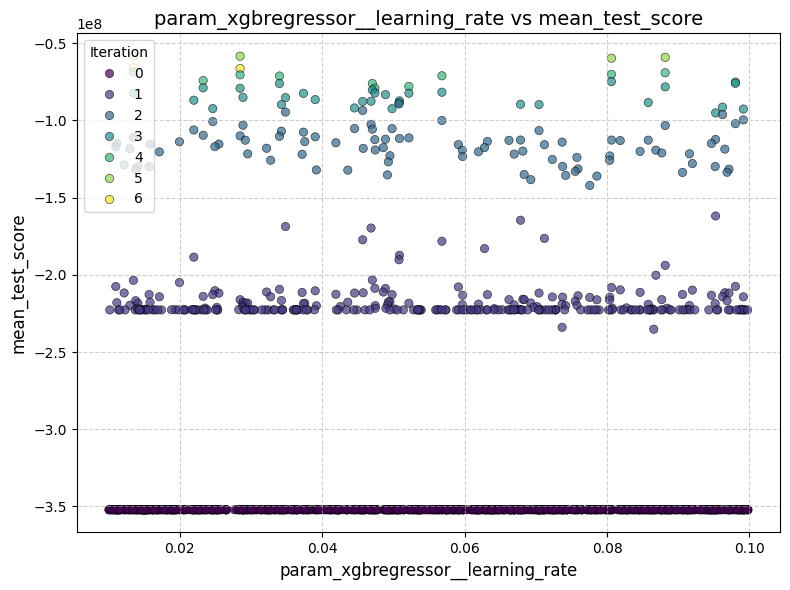

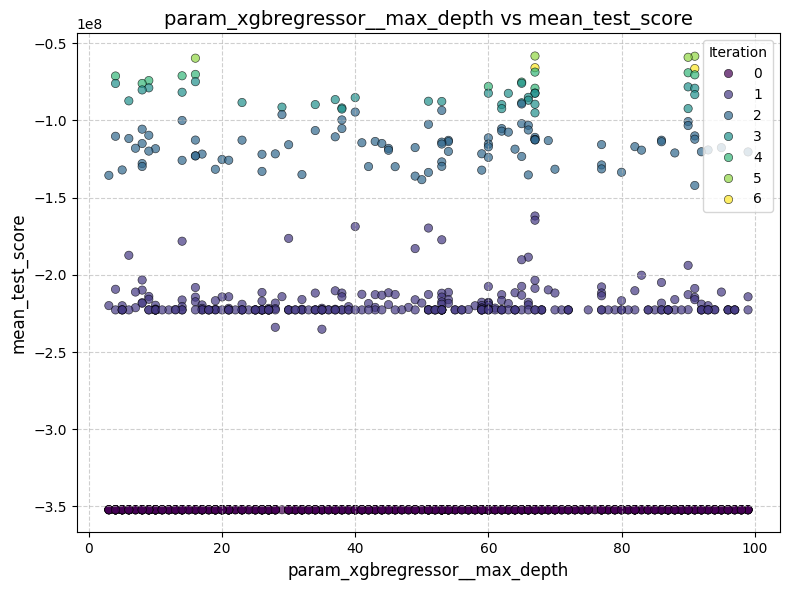

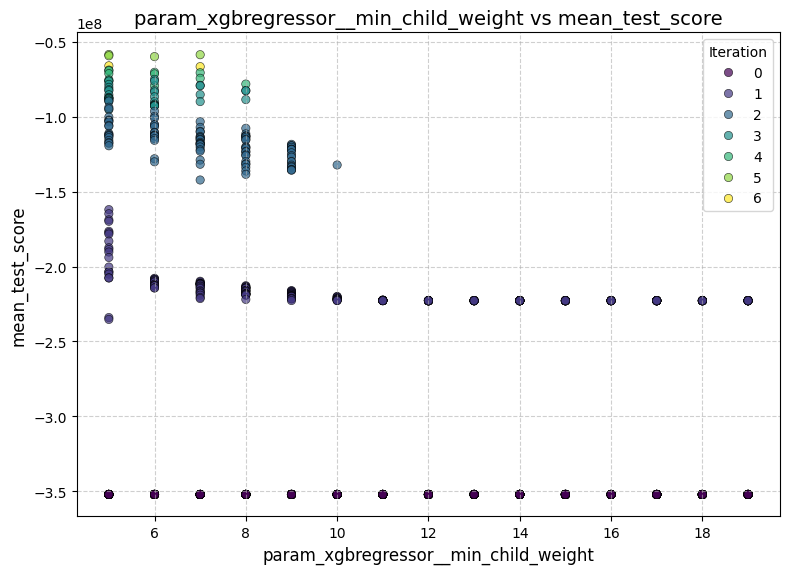

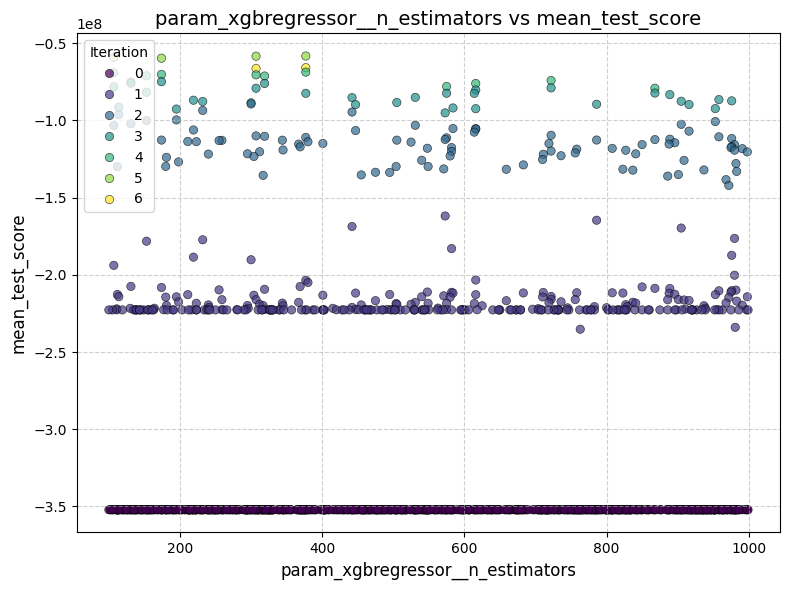

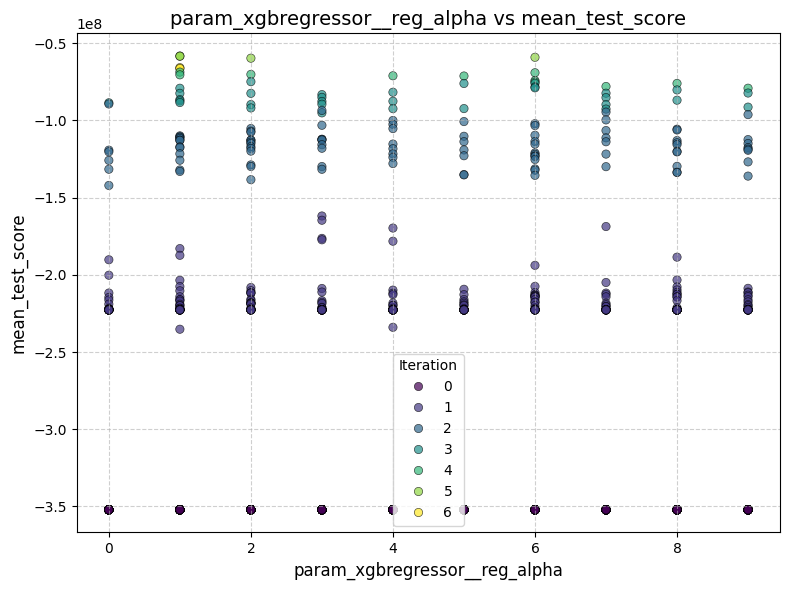

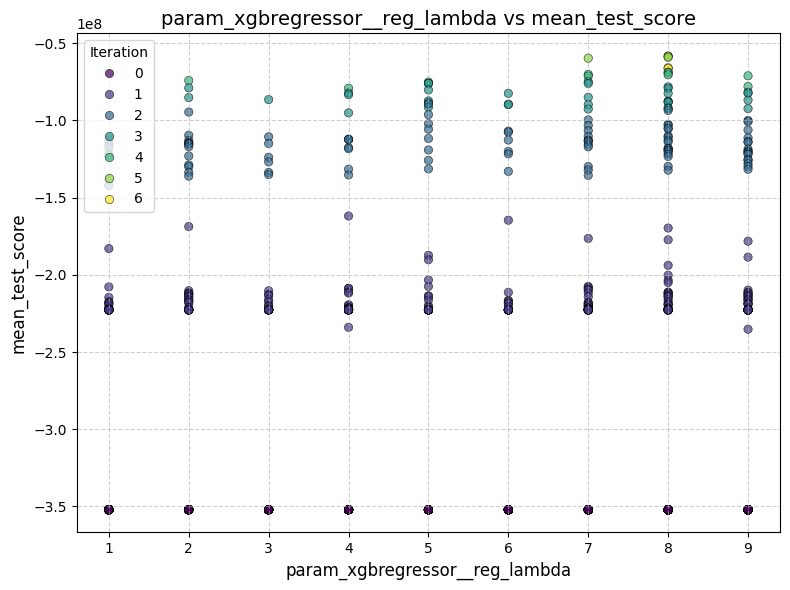

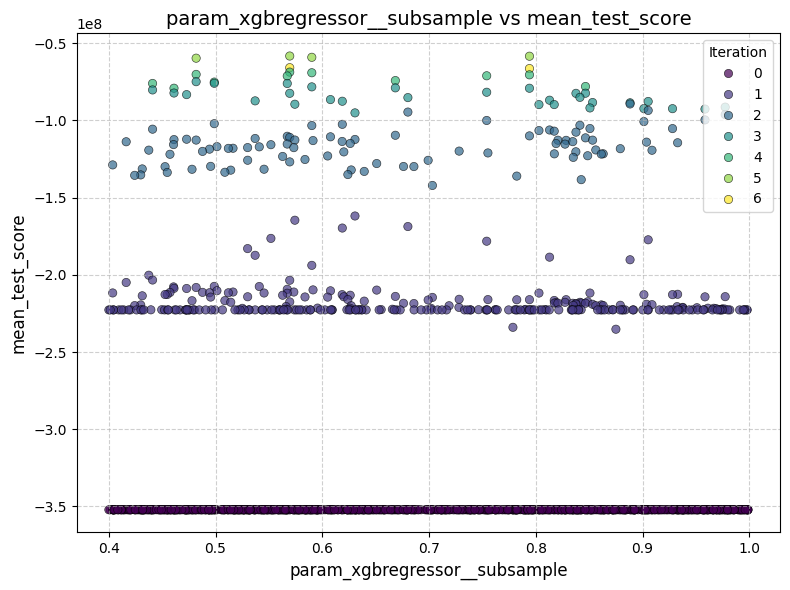

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant columns (parameters and mean_test_score)
parameter_columns = [col for col in halving_rand_cv_res.columns if col.startswith('param_')]
mean_test_score_col = 'mean_test_score'

# Iterate through each parameter and plot
for param in parameter_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=halving_rand_cv_res,
        x=param,
        y=mean_test_score_col,
        hue='iter',  # Color by iteration to observe trends over iterations
        palette='viridis',
        edgecolor='k',
        alpha=0.7
    )
    plt.title(f'{param} vs {mean_test_score_col}', fontsize=14)
    plt.xlabel(param, fontsize=12)
    plt.ylabel(mean_test_score_col, fontsize=12)
    plt.legend(title='Iteration', loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



In [ ]:
from xgboost import XGBRegressor
xgb_params = {'colsample_bytree': 0.603574744640959, 'gamma': 1.1042639148150446, 'learning_rate': 0.01350369669931007, 'max_depth': 67, 'min_child_weight': 5, 'n_estimators': 377, 'reg_alpha': 1, 'reg_lambda': 8, 'subsample': 0.569487246386216}

#train xgboost with these models
xgb_reg = make_pipeline(preprocessing, XGBRegressor(**xgb_params))


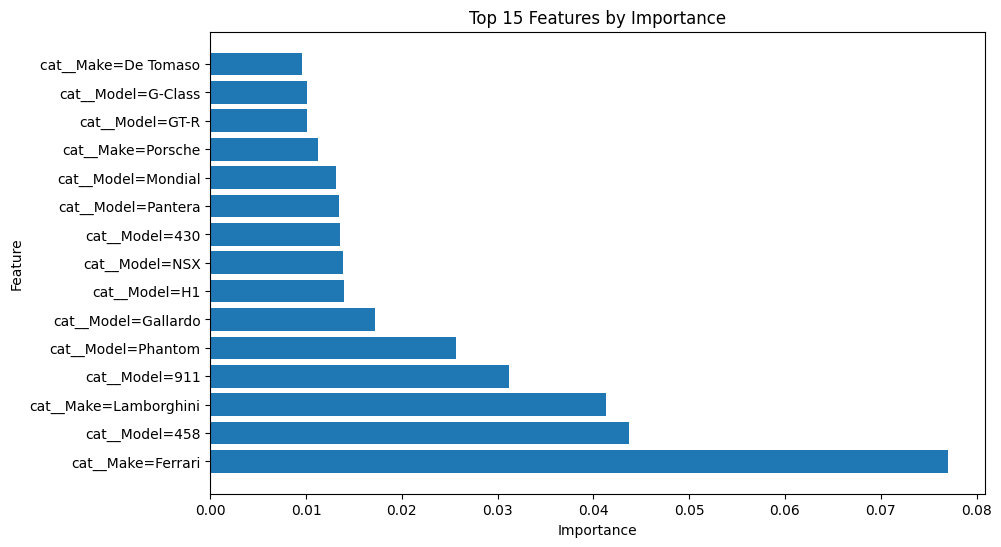

In [ ]:
#feature importance after training model
xgb_reg.fit(X_train, y_train)
xgb_feature_importances = xgb_reg.named_steps['xgbregressor'].feature_importances_
xgb_feature_importances_df = pd.DataFrame({
    "Feature": preprocessing.get_feature_names_out(),
    "Importance": xgb_feature_importances
})

xgb_feature_importances_df.to_csv('final_xgb_feature_importances.csv', index=False)

#plot top 15 features
top_15_features = xgb_feature_importances_df.nlargest(15, "Importance")
plt.figure(figsize=(10, 6))
plt.barh(top_15_features["Feature"], top_15_features["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features by Importance")
plt.show()


In [ ]:
catboost_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(feature_name_combiner=<function <lambda> at 0x7c640aa12440>,
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Make', 'Model', 'Engine', 'BodyType', 'DriveType', 'STATE'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['yearsold', 'Mileage', 'Year', 'NumCylinders', 'Age'], dtype='object'))])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7c640ac74e50>)])

In [ ]:
#get top 15 features for catboost
catboost_feature_importances = catboost_reg.named_steps['catboostregressor'].feature_importances_

catboost_feature_importances_df = pd.DataFrame({
    "Feature": preprocessing.get_feature_names_out(),
    "Importance": catboost_feature_importances
})

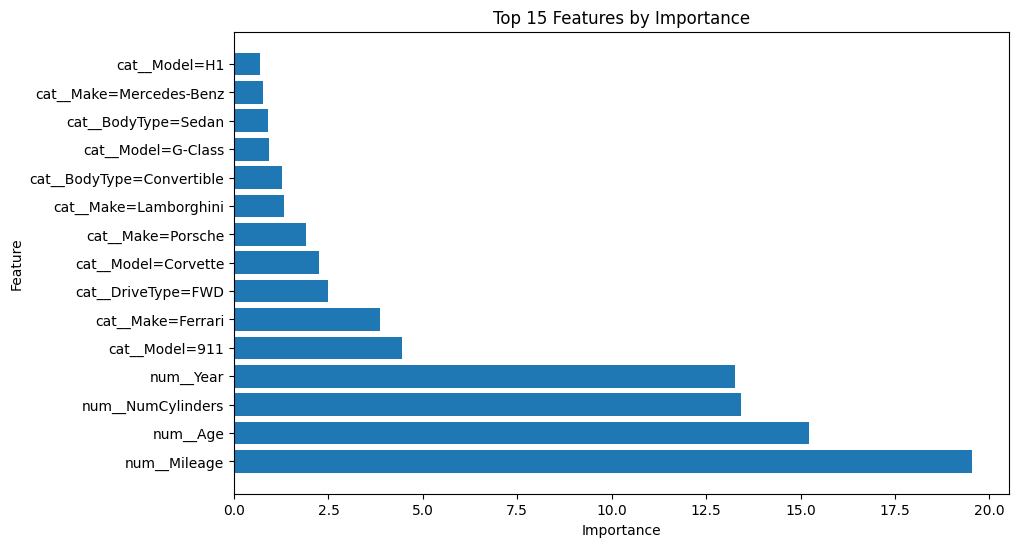

In [ ]:
#plot top 15 features
top_15_features = catboost_feature_importances_df.nlargest(15, "Importance")
plt.figure(figsize=(10, 6))
plt.barh(top_15_features["Feature"], top_15_features["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features by Importance")
plt.show()


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from catboost import CatBoostRegressor
from scipy.stats import randint, uniform

# Combine preprocessing and model into a single pipeline
catboost_pipeline = make_pipeline(preprocessing, CatBoostRegressor(silent=True, bootstrap_type='No'))

# Define the parameter grid for CatBoostRegressor (no bootstrap parameters)
param_grid = {
    'catboostregressor__depth': randint(3, 16),  # Random depth between 3 and 16
    'catboostregressor__learning_rate': uniform(0.01, 0.1),  # Random float between 0.01 and 0.1
    'catboostregressor__iterations': randint(100, 1000),  # Random integer between 100 and 1000
    'catboostregressor__l2_leaf_reg': uniform(1, 10),  # Random float between 1 and 10
    'catboostregressor__random_strength': uniform(0.1, 10)  # Random float for random strength
}

# Halving Random Search
halving_search = HalvingRandomSearchCV(
    estimator=catboost_pipeline,
    param_distributions=param_grid,
    factor=3,  # Number of candidates reduced at each iteration
    scoring='neg_mean_squared_error',
    resource='n_samples',
    max_resources=5000,
    random_state=42,
    n_jobs=-1,
    cv=3
)

# Fit the search
halving_search.fit(X, y)

# Best Parameters
print("Best Parameters:", halving_search.best_params_)


Best Parameters: {'catboostregressor__depth': 13, 'catboostregressor__iterations': 482, 'catboostregressor__l2_leaf_reg': 1.8011484638467514, 'catboostregressor__learning_rate': 0.09948166560605276, 'catboostregressor__random_strength': 5.5759237615373625}


In [ ]:
#print all parameter values
halving_rand_cv_res = pd.DataFrame(halving_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_rand_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant columns (parameters and mean_test_score)
parameter_columns = [col for col in halving_rand_cv_res.columns if col.startswith('param_')]
mean_test_score_col = 'mean_test_score'

# Iterate through each parameter and plot
for param in parameter_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=halving_rand_cv_res,
        x=param,
        y=mean_test_score_col,
        hue='iter',  # Color by iteration to observe trends over iterations
        palette='viridis',
        edgecolor='k',
        alpha=0.7
    )
    plt.title(f'{param} vs {mean_test_score_col}', fontsize=14)
    plt.xlabel(param, fontsize=12)
    plt.ylabel(mean_test_score_col, fontsize=12)
    plt.legend(title='Iteration', loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import root_mean_squared_error
from catboost import CatBoostRegressor
cat_params = {'depth': 13, 'iterations': 482, 'l2_leaf_reg': 1.8011484638467514, 'learning_rate': 0.09948166560605276, 'random_strength': 5.5759237615373625}

#use cat_params for catboost
catboost_reg = make_pipeline(preprocessing, CatBoostRegressor(**cat_params))
catboost_reg.fit(X_train, y_train)

final_predictions = catboost_reg.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(f'The RMSE of the selected model {final_rmse:.0f}.')

0:	learn: 11686.0977798	total: 6.32s	remaining: 50m 38s
1:	learn: 11314.6615259	total: 10.6s	remaining: 42m 23s
2:	learn: 10989.5293337	total: 15.6s	remaining: 41m 38s
3:	learn: 10726.9406219	total: 21.5s	remaining: 42m 46s
4:	learn: 10498.3767963	total: 27s	remaining: 42m 58s
5:	learn: 10247.6094418	total: 32.2s	remaining: 42m 34s
6:	learn: 10037.1942078	total: 39.3s	remaining: 44m 25s
7:	learn: 9836.6802260	total: 45.5s	remaining: 44m 58s
8:	learn: 9647.8695897	total: 53.5s	remaining: 46m 51s
9:	learn: 9501.7186244	total: 1m	remaining: 47m 30s
10:	learn: 9378.8695979	total: 1m 8s	remaining: 49m 1s
11:	learn: 9227.8835333	total: 1m 16s	remaining: 50m 10s
12:	learn: 9150.9411748	total: 1m 25s	remaining: 51m 25s
13:	learn: 9052.2019281	total: 1m 35s	remaining: 53m 18s
14:	learn: 8976.8484218	total: 1m 43s	remaining: 53m 33s
15:	learn: 8871.4397093	total: 1m 49s	remaining: 53m
16:	learn: 8807.1435941	total: 1m 54s	remaining: 52m 15s
17:	learn: 8741.1841945	total: 2m 1s	remaining: 52m 17s

In [ ]:
final_predictions = pd.DataFrame(final_predictions, columns=['pricesold'])
final_predictions.to_csv('cat_final_predictions.csv', index=False)

#save feature importances
catboost_feature_importances = catboost_reg.named_steps['catboostregressor'].feature_importances_

catboost_feature_importances_df = pd.DataFrame({
    "Feature": preprocessing.get_feature_names_out(),
    "Importance": catboost_feature_importances
})

catboost_feature_importances_df.to_csv('final_cat_feature_importances.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
catboost_feature_importances_df = pd.read_csv('/content/catboost_feature_importances.csv')

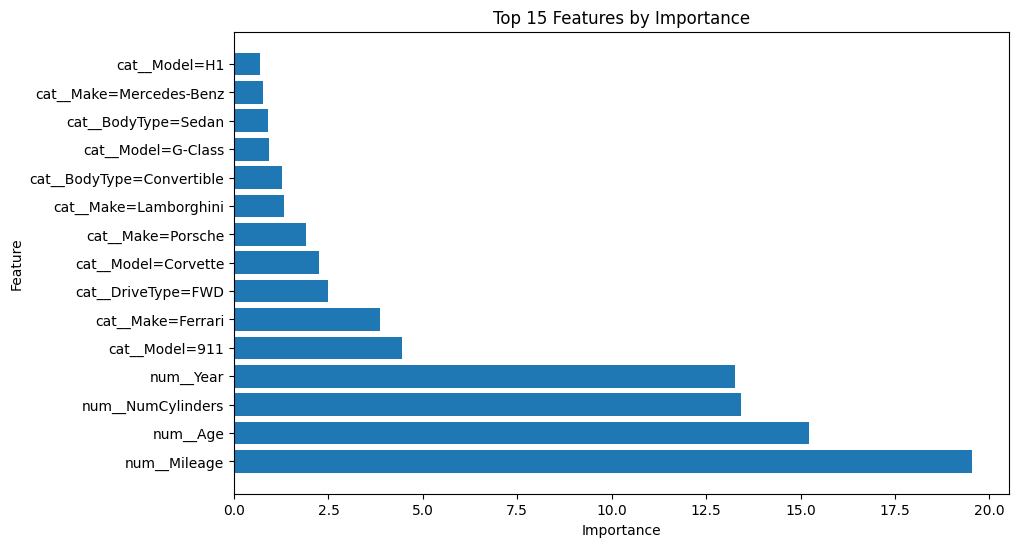

In [ ]:
#plot top 15 features after training
top_15_features = catboost_feature_importances_df.nlargest(15, "Importance")
plt.figure(figsize=(10, 6))
plt.barh(top_15_features["Feature"], top_15_features["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features by Importance")
plt.show()




## Ensembling

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from joblib import Memory

cat_params = {
    'depth': 13,
    'iterations': 482,
    'l2_leaf_reg': 1.8011484638467514,
    'learning_rate': 0.09948166560605276,
    'random_strength': 5.5759237615373625,
    'silent': True,
    'thread_count': -1

}
xgb_params = {
    'colsample_bytree': 0.603574744640959,
    'gamma': 1.1042639148150446,
    'learning_rate': 0.01350369669931007,
    'max_depth': 67,
    'min_child_weight': 5,
    'n_estimators': 377,
    'reg_alpha': 1,
    'reg_lambda': 8,
    'subsample': 0.569487246386216,
    'n_jobs': -1
}


# Define the stacking regressor
stacking_reg = StackingRegressor(
    estimators=[
        ('xgb', XGBRegressor(**xgb_params)),
        ('cat', CatBoostRegressor(**cat_params))
    ],
    passthrough=True,
    final_estimator=RandomForestRegressor(),
    cv=3,
    #n_jobs=-1
)

# Combine preprocessing and stacking regressor into a single pipeline
stacking_pipeline = make_pipeline(preprocessing, stacking_reg)


# Fit the pipeline
stacking_pipeline.fit(X_train, y_train)

In [ ]:
# Predict and evaluate
from sklearn.metrics import root_mean_squared_error
stacking_predictions = stacking_pipeline.predict(X_test)
stacking_rmse = root_mean_squared_error(y_test, stacking_predictions)

print("Stacking RMSE:", stacking_rmse)

Stacking RMSE: 6312.09275048928


In [ ]:
stacking_predictions = pd.DataFrame(stacking_predictions, columns=['pricesold'])
stacking_predictions.to_csv('stacking_predictions.csv', index=False)

In [ ]:
#make a null model that predicts average value of price sold for every column
from sklearn.metrics import root_mean_squared_error
null_model_predictions = np.full(len(y_test), y_train.mean())
null_model_rmse = root_mean_squared_error(y_test, null_model_predictions)
print("Null Model RMSE:", null_model_rmse)


Null Model RMSE: 11866.66945647208
